# Анализ рынка продажи автомобилей в Казахстане за январь-сентябрь 2019 года

<p></p>

<div style="border:solid black 1px; padding: 20px">В датасете представлены данные о продажах автомобилей на территории Казахстана в январе-сентябре 2019 года всеми официальными автодилерами, которые собрала статистическая компания-агрегатор.</div>

<p></p>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Цель исследования.</b></font>
    <br />
    <br />
    <font color='778899'>подготовить исследование рынка продаж автомобилей в Казахстане, найти интересные особенности и презентовать полученные результаты. </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Задачи исследования.</b></font>
    <br />
    <br />
    <font color='778899'> 1 Загрузить данные <br />
2 Очистить данные <br />
● привести данные в столбцах к единообразию; <br />
● избавиться или исправить некорректные значения данных; <br />
● закодировать данные, где это целесообразно (например, страна-
производитель) <br />
3 Провести исследовательский анализ данных <br />
● провести первичный анализ признаков в датасете <br />
4 Провести анализ рынка <br />
● описать ситуацию на рынке через базовые показатели <br />
5 Подготовить выводы и рекомендации <br />
     </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Исходные данные.</b></font>
    <br />
    <br />
<font color='778899'>
Файл auto_kz_2019_датасет.csv:<br /><br />
Год – год продажи (2019)<br />
Месяц – месяц продажи (январь - сентябрь)<br />
Компания – название автоцентра<br />
Бренд – название продаваемой марки автомобиля<br />
Модель – название модели автомобиля<br />
Модификация – модификация модели автомобиля<br />
Год выпуска – год производства автомобиля<br />
Страна-производитель – страна, где произведен автомобиль<br />
Вид топлива – бензин, дизель, электричество, гибрид<br />
Объём двиг л – объем двигателя автомобиля в литрах<br />
Коробка передач – тип коробки переключения передач <br />
Тип привода – тип привода <br />
Сегмент – сегмент, к которому относится авто <br />
Регион – регион продажи <br />
Наименование дилерского центра – совпадает с компанией <br />
Тип клиента – юридическое или физическое лицо (<br />
Форма расчета – наличный и безналичный расчет <br />
Количество – количество автомобилей в заказе <br />
Цена USD – цена автомобиля<br />
Продажа USD – цена заказа <br />
Область – область продажи<br />
Сегментация 2013 – сегмент автомобиля актуальный<br />
Класс 2013 – класс автомобиля актуальный<br />
Сегментация Eng – английская сегментация <br />
Локализация производства – совпадает со страной производителем<br />
</font><p></p>
</div>

## Загрузка данных и подготовка их к анализу.

### Загрузка данных.

In [1153]:
#Импортирую библиотеки.
from io import BytesIO
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
import plotly.express as px
from plotly import graph_objects as go
import re 

In [1154]:
from IPython.display import HTML, display
from tabulate import tabulate

In [1155]:
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle")
sns.set_style("whitegrid")

### Изучение датасета.

In [1156]:
#ссылка на датасет
#https://docs.google.com/spreadsheets/d/1C-lFYB-G0z2kpDcuob4R_idax_HyEB1b7VALjtuqu18/edit?usp=sharing

In [1157]:
file_name = 'https://docs.google.com/spreadsheets/d/1C-lFYB-G0z2kpDcuob4R_idax_HyEB1b7VALjtuqu18/export?format=csv'
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df 

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,наличный,1.0,"32246,99","32246,99",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,безналичный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,наличный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство


In [1158]:
df.head(10)

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,наличный,1.0,"32246,99","32246,99",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,безналичный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,наличный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
5,2019,Февраль,Mercur Auto,Audi,A6,TFSI,2017,Германия,Бензин,2,...,Физ. Лицо,Наличная,1.0,"42608,25485","42608,25485",г.Нур-Султан,Легковые автомобили,E класс,E,Импорт
6,2019,Май,Mercur Auto,Audi,A6,TFSI,2019,Германия,Бензин,3,...,Физ. Лицо,наличный,1.0,82344,82344,г.Алматы,Легковые автомобили,E класс,E,Импорт
7,2019,Июнь,Mercur Auto,Audi,A6,TFSI,2019,Германия,Бензин,3,...,Физ. Лицо,наличный,1.0,78940,78940,г.Алматы,Легковые автомобили,E класс,E,Импорт
8,2019,Июнь,Mercur Auto,Audi,A6,TFSI,2019,Германия,Бензин,3,...,Физ. Лицо,наличный,1.0,78940,78940,г.Алматы,Легковые автомобили,E класс,E,Импорт
9,2019,Июнь,Mercur Auto,Audi,A6,TFSI Allroad,2017,Германия,Бензин,3,...,Юр. Лицо,безналичный,1.0,64474,64474,г.Алматы,Легковые автомобили,E класс,E,Импорт


In [1159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

In [1160]:
df.isna().sum()

Год                                   0
Месяц                                 0
Компания                              0
Бренд                                 0
Модель                                0
Модификация                        3591
Год выпуска                         501
Страна-производитель                  0
Вид топлива                        3140
Объём двиг, л,                     4258
Коробка передач                    3255
Тип привода                        4289
Сегмент                            6761
Регион                                0
Наименование дилерского центра        0
Тип клиента                        7047
Форма расчета                     25928
Количество                            6
Цена, USD                             0
Продажа, USD                          0
Область                               0
Сегментация 2013                      0
Класс 2013                            0
Сегментация Eng                       0
Локализация производства              0


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p>Датафрейм имеет 25 столбцов и 39966 строк, пропуски есть d 10ти столбцах. В причинах пропусков предстоит разобраться и решить, что с ними делать. Типы данных в стобцах не соответсвуют данным в них. 

## Предобработка данных.

### Работа с дубликатами

#### Проверка на явные дубликаты.

In [1161]:
print('Количество дубликатов:\n', df[df.duplicated()].count())

Количество дубликатов:
 Год                               18712
Месяц                             18712
Компания                          18712
Бренд                             18712
Модель                            18712
Модификация                       18385
Год выпуска                       18444
Страна-производитель              18712
Вид топлива                       17459
Объём двиг, л,                    16746
Коробка передач                   17337
Тип привода                       16644
Сегмент                           16519
Регион                            18712
Наименование дилерского центра    18712
Тип клиента                       17931
Форма расчета                      7015
Количество                        18712
Цена, USD                         18712
Продажа, USD                      18712
Область                           18712
Сегментация 2013                  18712
Класс 2013                        18712
Сегментация Eng                   18712
Локализация прои

*Кажется, что много дубликатов, но продажа не персонализирована, нет никакого id. Если дубликаты и есть, мы не можем их распознать.*

#### Проверка на неявные дубликаты.

**Столбец "Год"**

In [1162]:
#смотрим уникальные значения
df['Год'].unique()

array([2019], dtype=int64)

*Тут все хорошо.*

**Столбец "Компания"**

In [1163]:
#смотрим уникальные значения
df['Компания'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors',
       'Hyundai Com Trans Kazakhstan', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors'],
      dtype=object)

In [1164]:
#приводим одинаковые названия к одному виду
df = df.replace({'Компания':{'Каспиан Моторс':'Caspian Motors','Astana Motors ':'Astana Motors'
                                        ,'Автокапитал':'Autokapital','ММС Рус':'MMC RUS'
                             ,'Равон Моторс Казахстан':'Ravon Motors Kazakstan'
                                        ,'Хино Моторс Казахстан':'Hino Motors','Hino Motors ':'Hino Motors'
                             ,'Mercur Autos':'Mercur Auto'}}) 

**Столбец "Год выпуска"**

In [1165]:
#смотрим уникальные значения
df['Год выпуска'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

In [1166]:
#приводим одинаковые названия к одному виду
df = df.replace({'Год выпуска':{'2\xa0018':'2018','2\xa0019':'2019'}})

**Столбец "Вид топлива"**

In [1167]:
#смотрим уникальные значения
df['Вид топлива'].unique()

array(['Бензин', 'Дизель', nan, 'дизель', 'бензин', 'гибрид', '2', '1,6',
       '0', 'Электро', 'Электричество'], dtype=object)

In [1168]:
#посмотрим строки, где необычное значение для этого столбца-0
df.loc[df['Вид топлива'] == '0']

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
37121,2019,Январь,БИПЭК АВТО,UAZ,3741,3741,2018,Республика Казахстан,0,"2,693",...,NaN,NaN,1.0,14200,14200,Алматинская область,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство
37122,2019,Январь,БИПЭК АВТО,UAZ,3741,3741,2018,Республика Казахстан,0,"2,693",...,NaN,NaN,3.0,14200,42600,Актюбинская область,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство
37123,2019,Январь,БИПЭК АВТО,UAZ,3741,3741,2018,Республика Казахстан,0,"2,693",...,NaN,NaN,2.0,14200,28400,Мангистауская область,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство


*Значение "0" имеет только UAZ 3741*

In [1169]:
#посмотрим у данного автомобиля уникальные значения вида топлива
df.loc[(df['Бренд'] == 'UAZ') & (df['Модель'] == '3741')]['Вид топлива'].unique()

array(['0', 'Бензин', nan], dtype=object)

*UAZ 3741 ездит на бензине*

*Тоже самое проделаем со значением "1.6" и "2"*

In [1170]:
#посмотрим строки, где необычное значение для этого столбца
df.loc[df['Вид топлива'] == '1,6']

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
23728,2019,Январь,Renault Россия,Renault,Duster,E1FB4JA,2018,Российская Федерация,"1,6",MT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23733,2019,Январь,Renault Россия,Renault,Duster,E1FB2JA,2018,Российская Федерация,"1,6",MT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23734,2019,Январь,Renault Россия,Renault,Duster,E0DB2JA,2018,Российская Федерация,"1,6",AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23735,2019,Январь,Renault Россия,Renault,Duster,E0DB2JA,2018,Российская Федерация,"1,6",AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23736,2019,Январь,Renault Россия,Renault,Duster,E0DB2JA,2018,Российская Федерация,"1,6",AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23751,2019,Январь,Renault Россия,Renault,Duster,E0DB2JA,2018,Российская Федерация,"1,6",AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23754,2019,Январь,Renault Россия,Renault,Duster,E1FB4JA,2018,Российская Федерация,"1,6",MT,...,NaN,NaN,1.0,"12249,61125","12249,61125",г.Алматы,Внедорожники,Субкомпактные SUV,K1,Импорт
23763,2019,Январь,Renault Россия,Renault,Duster,E1FB4JA,2018,Российская Федерация,"1,6",MT,...,NaN,NaN,1.0,"12249,61125","12249,61125",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23764,2019,Январь,Renault Россия,Renault,Duster,E1FB4JA,2018,Российская Федерация,"1,6",MT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Северо-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
24997,2019,Январь,Renault Россия,Renault,Sandero,SXP16PA5RB,2018,Российская Федерация,"1,6",0,...,NaN,NaN,1.0,"12476,89637","12476,89637",Атырауская область,Легковые автомобили,B класс,B,Импорт


In [1171]:
#посмотрим строки, где необычное значение для этого столбца
df.loc[df['Вид топлива'] == '2']

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
23723,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2019,Российская Федерация,2,MT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23724,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23725,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23726,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Кызылординская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23727,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2018,Российская Федерация,2,MT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23729,2019,Январь,Renault Россия,Renault,Duster,E1FB4AGA,2018,Российская Федерация,2,AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23730,2019,Январь,Renault Россия,Renault,Duster,E1FB4AGA,2018,Российская Федерация,2,AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23731,2019,Январь,Renault Россия,Renault,Duster,E1FB4AG,2018,Российская Федерация,2,MT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23732,2019,Январь,Renault Россия,Renault,Duster,E1FB4AG,2018,Российская Федерация,2,MT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23746,2019,Январь,Renault Россия,Renault,Duster,E2PGB4AGA,2018,Российская Федерация,2,AT,...,NaN,NaN,1.0,"12249,61125","12249,61125",Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт


*Тут два автомобиля - "Renault Duster" и "Renault Sandero"* 

In [1172]:
#посмотрим у Renault Duster уникальные значения вида топлива
df.loc[(df['Бренд'] == 'Renault') & (df['Модель'] == 'Duster')]['Вид топлива'].unique()

array(['2', '1,6', nan, 'Бензин'], dtype=object)

In [1173]:
#посмотрим у Renault Sandero уникальные значения вида топлива
df.loc[(df['Бренд'] == 'Renault') & (df['Модель'] == 'Sandero')]['Вид топлива'].unique()

array([nan, '1,6', 'Бензин'], dtype=object)

*У обоих бензин.Поменяем значения так, чтобы остались только бензин, электричество, гибрид или дизель, либо пропуск*

In [1174]:
df = df.replace({'Вид топлива':{'бензин':'Бензин','Электро':'Электричество','дизель':'Дизель'
                                ,'2':'Бензин', '1,6':'Бензин','0':'Бензин'
                                }})

In [1175]:
#проверяем
df['Вид топлива'].unique()

array(['Бензин', 'Дизель', nan, 'гибрид', 'Электричество'], dtype=object)

**Столбец "Объём двиг, л,"**

In [1176]:
#смотрим уникальные значения
df['Объём двиг, л,'].unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7', '3.5', '4.6', '4,6', '5.7', '1,8',
       '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2', '1,485',
       'MT', 'AT', '0', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G',
       '2.8', '2,693', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L',
       '6,5'],

In [1177]:
#оставляем только цифры и удаляем пробелы
df['Объём двиг, л,'] = df['Объём двиг, л,'].str.replace(r"[^\d\.\,]", "", regex=True)

In [1178]:
#запятые меняем на точки
df['Объём двиг, л,'] = df['Объём двиг, л,'].str.replace(",", ".")

In [1179]:
df['Объём двиг, л,'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', nan, '2.8', '4.3', '4.3.', '2.0', '3.9',
       '7.5', '12.3', '3.5', '5.6', '5.2', '3.0', '5', '1.598', '1.248',
       '1.998', '2.359', '1.999', '3.342', '1.591', '3.47', '1.69',
       '1.774', '4.6', '1.8', '10.5', '4', '5.5', '12', '12.8', '11',
       '2.2', '1.2', '1.485', '', '0', '13', '1.33', '4.0', '2.693',
       '3.8', '3.6', '7.6', '4.9', '2.9', '400..', '4.98.', '4.98', '88',
       '8.4.', '6.5'], dtype=object)

In [1180]:
#самостоятельно посмотрев одно нестандартное значение, обнаружила, что оно принадлежит Chevrolet Niva
#посмотрим все уникальные значения объема двигателя нивы
df.loc[(df['Бренд'] == 'Chevrolet') & (df['Модель'] == 'Niva')]['Объём двиг, л,'].unique()

array(['1.7', '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7',
       '19.7', '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7',
       '11.7', '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7',
       '2.7'], dtype=object)

In [1181]:
#для Chevrolet Niva устанавливем реальное значение 
df.loc[(df['Бренд'] == 'Chevrolet') & (df['Модель'] == 'Niva'),['Объём двиг, л,']]='1.8'

In [1182]:
#предварительно проверив значения больше 10 (они реальны), заменяем нестандартные значения
df = df.replace({'Объём двиг, л,':{'88':'8.8','8.4.':'8.4','4.3.':'4.3','4.98.':'4.98','400..':np.nan,'0':np.nan,'':np.nan}})

In [1183]:
#проверим
df['Объём двиг, л,'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.8', '6.2',
       '2.5', '1.6', nan, '2.7', '2.8', '4.3', '2.0', '3.9', '7.5',
       '12.3', '3.5', '5.6', '8.7', '5.2', '3.0', '5', '1.598', '1.248',
       '1.998', '2.359', '1.999', '3.342', '1.591', '3.47', '1.69',
       '1.774', '1.7', '4.6', '5.7', '10.5', '4', '5.5', '12', '12.8',
       '11', '2.2', '1.2', '1.485', '13', '1.33', '4.0', '2.693', '3.8',
       '3.6', '7.6', '4.9', '2.9', '4.98', '8.8', '8.4', '6.7', '6.5'],
      dtype=object)

**Столбец "Коробка передач"**

In [1184]:
#смотрим уникальные значения
df['Коробка передач'].unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '4WD', 'Передний', '0', '7 DSG',
       '7DSG', '6 DSG', '6DSG', '#Н/Д', 'DSG', '6A', '6А', '5M', 'A/T',
       'M/T', 'МКП', '5М', 'М/T', '7 АКП', '7АКП', 'А/T', '8A', 'TDI',
       '9AT', 'РЕДУКТОР'], dtype=object)

In [1185]:
#оставляем только буквы
df['Коробка передач'] = df['Коробка передач'].str.replace(r"[^\w\s]+|[\d]+", "", regex=True)

In [1186]:
#удаоляем прообелы
df['Коробка передач']=df['Коробка передач'].str.replace(" ", "")

In [1187]:
#приводим одинаковые названия к одному виду 'AT'
df['Коробка передач'].replace(
    to_replace=['Stronic','STronic','Tiptronic','АКПП','АКП','Steptronic'
                ,'PowershiftS','DCT','CVT','AMT','CVTвариатор', 'CVTвариATор', 'CVTвAриATор',
       'GTRONIC', 'PDK', 'ступАКПП', 'АКППTiptronicS', 'АКППPDK',
       'AT', 'АТ', 'АT', 'DSG', 'WD', 'Передний', 'НД', 'A', 'А', 'TDI', 'РЕДУКТОР'],
    value='AT',
    inplace=True
)

In [1188]:
#приводим одинаковые названия к одному виду 'MT'
df['Коробка передач'].replace(
    to_replace=['МТ', 'MT','Мех', 'МКПП','МT','M','МКП','М'],
    value='MT',
    inplace=True
)

In [1189]:
#проверяем
df['Коробка передач'].unique()

array(['AT', 'MT', nan, ''], dtype=object)

In [1190]:
#посмотрим строки со значением ''
df.loc[df['Коробка передач'] == '']

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
21879,2019,Февраль,Mercur Auto,Porsche,Cayenne,Cayenne,2018,Германия,Бензин,3,...,Физ. Лицо,Безналичная,1.0,90000,90000,г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт
21880,2019,Февраль,Mercur Auto,Porsche,Cayenne,Cayenne S,2018,Германия,Бензин,3,...,Физ. Лицо,Безналичная,1.0,"121474,8964","121474,8964",г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт
21881,2019,Февраль,Mercur Auto,Porsche,Cayenne,Cayenne E-Hybrid,2018,Германия,Бензин,3,...,Физ. Лицо,Безналичная,1.0,"132373,5387","132373,5387",г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт
21882,2019,Февраль,Mercur Auto,Porsche,Cayenne,Cayenne S,2018,Германия,Бензин,3,...,Физ. Лицо,Безналичная,1.0,"114165,9762","114165,9762",г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт
21883,2019,Февраль,Mercur Auto,Porsche,Cayenne,Cayenne,2018,Германия,Бензин,3,...,Физ. Лицо,Безналичная,1.0,"96249,73469","96249,73469",г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт
24997,2019,Январь,Renault Россия,Renault,Sandero,SXP16PA5RB,2018,Российская Федерация,Бензин,NaN,...,NaN,NaN,1.0,"12476,89637","12476,89637",Атырауская область,Легковые автомобили,B класс,B,Импорт
25002,2019,Январь,Renault Россия,Renault,Sandero,SUT16PA5RB,2018,Российская Федерация,Бензин,NaN,...,NaN,NaN,1.0,"12476,89637","12476,89637",Атырауская область,Легковые автомобили,B класс,B,Импорт
25023,2019,Январь,Renault Россия,Renault,Sandero,SXP16PA5RB,2018,Российская Федерация,Бензин,NaN,...,NaN,NaN,1.0,"12476,89637","12476,89637",г.Нур-Султан,Легковые автомобили,B класс,B,Импорт


In [1191]:
#проверим какие значения коробки передач у Porsche Cayenne
df.loc[(df['Бренд'] == 'Porsche') & (df['Модель'] == 'Cayenne')]['Коробка передач'].unique()

array(['AT', ''], dtype=object)

In [1192]:
#заменим все на АТ, так как других значений нет
df.loc[(df['Бренд'] == 'Porsche') & (df['Модель'] == 'Cayenne'),['Коробка передач']]='AT'

In [1193]:
#посмотрим какие коробки передач у Renault Sandero, и сколько машин с каждой 
df.loc[(df['Бренд'] == 'Renault') & (df['Модель'] == 'Sandero')].value_counts('Коробка передач')

Коробка передач
      3
AT    2
MT    1
dtype: int64

In [1194]:
#посмотрим сколько всего пропусков
df.loc[(df['Бренд'] == 'Renault') & (df['Модель'] == 'Sandero')].count()

Год                               441
Месяц                             441
Компания                          441
Бренд                             441
Модель                            441
Модификация                       441
Год выпуска                       441
Страна-производитель              441
Вид топлива                         6
Объём двиг, л,                      1
Коробка передач                     6
Тип привода                        45
Сегмент                            85
Регион                            441
Наименование дилерского центра    441
Тип клиента                       344
Форма расчета                       0
Количество                        441
Цена, USD                         441
Продажа, USD                      441
Область                           441
Сегментация 2013                  441
Класс 2013                        441
Сегментация Eng                   441
Локализация производства          441
dtype: int64

*В основном у Renault Sandero колонка 'Коробка передач' не заполнена*

In [1195]:
#заменяю оставшиеся значения '', которые приналежат Renault Sandero, пропусками 
df.loc[df['Коробка передач'] == '']=np.nan

In [1196]:
#проверяю, что осталось
df['Коробка передач'].unique()

array(['AT', 'MT', nan], dtype=object)

**Столбец "Тип привода"**

In [1197]:
#смотрим уникальные значения
df['Тип привода'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

*Заменим похожие значения, так, чтобы осталось только FWD, RWD, 4WD, 2WD*

In [1198]:
df['Тип привода'].replace(
    to_replace=['передний', 'FWD', 'Передний', 'Передний (FF)', 'FF'],
    value='FWD',
    inplace=True
)

In [1199]:
df['Тип привода'].replace(
    to_replace=['Задний'],
    value='RWD',
    inplace=True
)

In [1200]:
df['Тип привода'].replace(
    to_replace=['quattro', 'Полный', 'AWD', '4WD', '4 WD',
       '4X4', '4х4', '4x4','полный'],
    value='4WD',
    inplace=True
)

In [1201]:
df['Тип привода'].replace(
    to_replace=['4х2.2', '2 WD', '2WD','4x2', '4х2', '4X2','#Н/Д', 'полный', '4Motion'],
    value='2WD',
    inplace=True
)

In [1202]:
#проверяем
df['Тип привода'].unique()

array(['FWD', '4WD', 'RWD', '2WD', nan, 'Астана', '0'], dtype=object)

In [1203]:
#смотрим автомобиль со значением 'Астана'
df.loc[df['Тип привода'] == 'Астана']

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
15771,2019.0,Май,ТК КАМАЗ,KAMAZ,65116,KAMAZ 65116,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,безналичный,1.0,"55655,86316","55655,86316",г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39549,2019.0,Май,ТК КАМАЗ,KAMAZ,45141,KAMAZ 45141,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,безналичный,1.0,"53963,81966","53963,81966",г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство


In [1204]:
#смотрим автомобиль со значением '0'
df.loc[df['Тип привода'] == '0']

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
23737,2019.0,Январь,Renault Россия,Renault,Duster,DKGB4AGA,2018,Российская Федерация,NaN,NaN,...,NaN,NaN,1.0,"12249,61125","12249,61125",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23738,2019.0,Январь,Renault Россия,Renault,Duster,DKGB4AGA,2018,Российская Федерация,NaN,NaN,...,NaN,NaN,1.0,"12249,61125","12249,61125",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23739,2019.0,Январь,Renault Россия,Renault,Duster,DKGB4AGA,2018,Российская Федерация,NaN,NaN,...,NaN,NaN,1.0,"12249,61125","12249,61125",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23740,2019.0,Январь,Renault Россия,Renault,Duster,DKGB4AGA,2018,Российская Федерация,NaN,NaN,...,NaN,NaN,1.0,"12249,61125","12249,61125",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23741,2019.0,Январь,Renault Россия,Renault,Duster,DKGB4AGA,2018,Российская Федерация,NaN,NaN,...,NaN,NaN,1.0,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25028,2019.0,Январь,Renault Россия,Renault,Sandero,SUTA16M5RB,2018,Российская Федерация,NaN,NaN,...,NaN,NaN,1.0,"12476,89637","12476,89637",Костанайская область,Легковые автомобили,B класс,B,Импорт
25029,2019.0,Январь,Renault Россия,Renault,Sandero,SUTA16K5RB,2018,Российская Федерация,NaN,NaN,...,NaN,NaN,1.0,"12476,89637","12476,89637",Костанайская область,Легковые автомобили,B класс,B,Импорт
25030,2019.0,Январь,Renault Россия,Renault,Sandero,SUTA16K5RB,2018,Российская Федерация,NaN,NaN,...,NaN,NaN,1.0,"12476,89637","12476,89637",г.Нур-Султан,Легковые автомобили,B класс,B,Импорт
25031,2019.0,Январь,Renault Россия,Renault,Sandero,SUTA16K5RB,2018,Российская Федерация,NaN,NaN,...,NaN,NaN,1.0,"12476,89637","12476,89637",г.Нур-Султан,Легковые автомобили,B класс,B,Импорт


*Посмотрим какие еще есть типы привода у каждой марки автомобиля с нестандартным значением*

In [1205]:
#проверяем камазы
df.loc[(df['Бренд'] == 'KAMAZ') & (df['Модель'] == '45141')]['Тип привода'].unique()

array(['Астана', nan], dtype=object)

In [1206]:
df.loc[(df['Бренд'] == 'KAMAZ') & (df['Модель'] == '65116')]['Тип привода'].unique()

array([nan, 'Астана'], dtype=object)

*Кроме 'Астана' ничего нет, заменим на правильный, так как эта информация доступна в СМИ*

In [1207]:
df.loc[(df['Бренд'] == 'KAMAZ') & (df['Модель'] == '45141'),['Тип привода']]='4WD'

In [1208]:
df.loc[(df['Бренд'] == 'KAMAZ') & (df['Модель'] == '65116'),['Тип привода']]='RWD'

In [1209]:
#проверяем Renault Sandero
df.loc[(df['Бренд'] == 'Renault') & (df['Модель'] == 'Sandero')]['Тип привода'].unique()

array(['0', 'FWD', nan], dtype=object)

In [1210]:
#заменим пропуски и нестандартное значение на 'FWD', так как других значений нет
df.loc[(df['Бренд'] == 'Renault') & (df['Модель'] == 'Sandero'),['Коробка передач']]='FWD'

In [1211]:
#проверяем Renault Duster
df.loc[(df['Бренд'] == 'Renault') & (df['Модель'] == 'Duster')]['Тип привода'].unique()

array(['4WD', 'FWD', '0', nan], dtype=object)

In [1212]:
#заменяем '0', который остался у Renault Duster на пропуск, так как позже будем заменять модой
df = df.replace({'Тип привода':{'0':np.nan}})

In [1213]:
#проверяем, что осталось
df['Тип привода'].unique()

array(['FWD', '4WD', 'RWD', '2WD', nan], dtype=object)

**Столбец "Количество"**

In [1214]:
#смотрим уникальные значения
df['Количество'].unique()

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        19.,  12.,  70.,  29.,  18.,  37.,  17.,  15.,  24.,  14.,  13.,
        25.,  63.,  23.,  30.,  21.,  60.,  nan,  22.,  16.,  35.,  28.,
        32.,  54., 115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,
        26.,  31.,  34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.,
        79.,  62.])

In [1215]:
#поменяем -1, на 1
df = df.replace({'Количество':{-1.:1}})

**Столбец "Тип клиента"**

In [1216]:
#смотрим уникальные значения
df['Тип клиента'].unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

*Заменим похожие значения, так, чтобы осталось только физлицо и юрлицо*

In [1217]:
df['Тип клиента'].replace(
    to_replace=['Физ. Лицо', 'физ.лицо', 
       'физическое', 'ФизЛицо',],
    value='физлицо',
    inplace=True
)

In [1218]:
df['Тип клиента'].replace(
    to_replace=['Юр. Лицо', 'Юр.Лицо', 'юридическое',
       'ЮрЛицо', 'Корп. клиент'],
    value='юрлицо',
    inplace=True
)

In [1219]:
#некоторые пропуски можно заполнить по алгоритму: если в заказе больше 
#двух авто или тип транспорта «коммерческий», то это юридическое лицо

df.loc[df['Сегментация 2013'] == 'Коммерческие автомобили','Тип клиента']='юрлицо'

In [1220]:
df.loc[df['Количество'] >= 2.,'Тип клиента']='юрлицо'

In [1221]:
#проверим
df['Тип клиента'].unique()

array(['физлицо', 'юрлицо', nan], dtype=object)

*Столбцы «Модификация», «Сегмент», «Форма расчета», «Сегмент Eng» можно удалить (множество незаполняемых пропусков или дублируются другими столбцами).*

In [1222]:
#удаляем
df=df.drop(['Модификация', 'Сегмент', 'Форма расчета', 'Сегментация Eng', 'Наименование дилерского центра'], axis=1)

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p>В ходе работы с дубликатами выявили, что много явных дубликатов, но это проблема деперсонализации данных. По каждому столбцу обработали неявные дубликаты: привели данные в столбцах к единообразию; исправили некорректные значения данных. Удалили стобцы, в которых множество незаполняемых пропусков или они дублируются другими столбцами.

### Работа с типом данных 

In [1223]:
#еще раз посмотрим на типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Год                       39963 non-null  float64
 1   Месяц                     39963 non-null  object 
 2   Компания                  39963 non-null  object 
 3   Бренд                     39963 non-null  object 
 4   Модель                    39963 non-null  object 
 5   Год выпуска               39462 non-null  object 
 6   Страна-производитель      39963 non-null  object 
 7   Вид топлива               36823 non-null  object 
 8   Объём двиг, л,            35664 non-null  object 
 9   Коробка передач           37143 non-null  object 
 10  Тип привода               35615 non-null  object 
 11  Регион                    39963 non-null  object 
 12  Тип клиента               36277 non-null  object 
 13  Количество                39957 non-null  float64
 14  Цена, 

In [1224]:
#меняем тип данных на нужный
df['Год']=df['Год'].astype('Int64')

In [1225]:
#меняем тип данных на нужный
df['Год выпуска']=df['Год выпуска'].astype('Int64')

In [1226]:
#меняем тип данных на нужный
df['Объём двиг, л,']=df['Объём двиг, л,'].astype('float')

In [1227]:
#меняем тип данных на нужный
df['Количество']=df['Количество'].astype('Int64')

In [1228]:
#запятые меняем на точки
df['Цена, USD'] = df['Цена, USD'].str.replace(",", ".")

In [1229]:
#меняем тип данных на нужный
df['Цена, USD']=df['Цена, USD'].astype('float64')

In [1230]:
#запятые меняем на точки
df['Продажа, USD'] = df['Продажа, USD'].str.replace(",", ".")

In [1231]:
#меняем тип данных на нужный
df['Продажа, USD']=df['Продажа, USD'].astype('float64')

In [1232]:
df[df.applymap(np.isreal).all(1)]

,Год,Месяц,Компания,Бренд,Модель,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Регион,Тип клиента,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Локализация производства
24997,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
25002,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
25023,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [1233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Год                       39963 non-null  Int64  
 1   Месяц                     39963 non-null  object 
 2   Компания                  39963 non-null  object 
 3   Бренд                     39963 non-null  object 
 4   Модель                    39963 non-null  object 
 5   Год выпуска               39462 non-null  Int64  
 6   Страна-производитель      39963 non-null  object 
 7   Вид топлива               36823 non-null  object 
 8   Объём двиг, л,            35664 non-null  float64
 9   Коробка передач           37143 non-null  object 
 10  Тип привода               35615 non-null  object 
 11  Регион                    39963 non-null  object 
 12  Тип клиента               36277 non-null  object 
 13  Количество                39957 non-null  Int64  
 14  Цена, 

*Категориальные столбцы заменим на тип данных - 'category'*

In [1234]:
#список названий столбцов
#cat_col=['Вид топлива','Коробка передач','Тип привода','Сегментация 2013','Класс 2013']

In [1235]:
#for col in cat_col:
    #df[col]=df[col].astype('category')

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p>В процессе работы с типом данных, поменяли его, там где это необходимо. В основном в столбцах с числами. Также сократили до 2х знаков после точки.

### Работа с пропусками

In [1236]:
#посмотрим сколько всего пропусков
df.isna().sum()

Год                            3
Месяц                          3
Компания                       3
Бренд                          3
Модель                         3
Год выпуска                  504
Страна-производитель           3
Вид топлива                 3143
Объём двиг, л,              4302
Коробка передач             2823
Тип привода                 4351
Регион                         3
Тип клиента                 3689
Количество                     9
Цена, USD                      3
Продажа, USD                   3
Область                        3
Сегментация 2013               3
Класс 2013                     3
Локализация производства       3
dtype: int64

In [1237]:
#подозреваю, что 3 строки полностью пустые
#проверяю через пропуски в столбце 'Год'
df[df['Год'].isna()==True]

,Год,Месяц,Компания,Бренд,Модель,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Регион,Тип клиента,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Локализация производства
24997,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
25002,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
25023,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [1238]:
#удаляю пустые строки
df=df.dropna(subset=['Год'])

In [1239]:
#проверяем
df.isna().sum()

Год                            0
Месяц                          0
Компания                       0
Бренд                          0
Модель                         0
Год выпуска                  501
Страна-производитель           0
Вид топлива                 3140
Объём двиг, л,              4299
Коробка передач             2820
Тип привода                 4348
Регион                         0
Тип клиента                 3686
Количество                     6
Цена, USD                      0
Продажа, USD                   0
Область                        0
Сегментация 2013               0
Класс 2013                     0
Локализация производства       0
dtype: int64

*Группируя по бренду и модели, нужно максимально заполнить пропуски модой значений. С пропусками останутся только модели, у которых ни в одной строке нет данных, для того чтобы определить моду.*

In [1240]:
df['Год выпуска'] = df.groupby(['Бренд', 'Модель'])['Год выпуска'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) >= 1 else x) 

In [1241]:
df['Вид топлива'] = df.groupby(['Бренд', 'Модель'])['Вид топлива'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) >= 1 else x) 

In [1242]:
df['Объём двиг, л,'] = df.groupby(['Бренд', 'Модель'])['Объём двиг, л,'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) >= 1 else x) 

In [1243]:
df['Коробка передач'] = df.groupby(['Бренд', 'Модель'])['Коробка передач'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) >= 1 else x) 

In [1244]:
df['Тип привода'] = df.groupby(['Бренд', 'Модель'])['Тип привода'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) >= 1 else x) 

In [1245]:
df['Тип клиента'] = df.groupby(['Бренд', 'Модель'])['Тип клиента'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) >= 1 else x) 

In [1246]:
#смотрим сколько осталось
df.isna().sum()

Год                            0
Месяц                          0
Компания                       0
Бренд                          0
Модель                         0
Год выпуска                    6
Страна-производитель           0
Вид топлива                  899
Объём двиг, л,              1810
Коробка передач             1130
Тип привода                 1759
Регион                         0
Тип клиента                  284
Количество                     6
Цена, USD                      0
Продажа, USD                   0
Область                        0
Сегментация 2013               0
Класс 2013                     0
Локализация производства       0
dtype: int64

*Оставшиеся пропуски удалить нельзя, так как их еще много. Посмотрим сколько моделей автомобилей без данных о виде топлива.*

In [1247]:
df2=df[df['Вид топлива'].isna()==True]

In [1248]:
df2[['Бренд','Модель']].value_counts()

Бренд                Модель        
Renault              Logan             320
                     Kaptur            230
                     Arkana             55
Mazda                CX-5               51
Shacman              SX3258DR384        43
Renault              Dokker             34
ANKAI                HF-D105            30
Mazda                6                  30
                     CX-9               26
Foton                BJ1069VDJEA-F1     19
Dong Feng            BWC6665GA5         10
Foton                BJ3253DMPKB-AD      9
Renault              Master              8
Урал                 4320                7
Hyundai Truck & Bus  EX8                 6
Mazda                3                   5
Iveco                Tipper              4
Урал                 5557                2
Iveco                Daily A             2
                     Stralis             2
Hyundai Truck & Bus  HD 160              1
Iveco                Daily V             1
Урал              

*Много моделей. Найти информацию с внешнего источника будет долго. При этом одна модель может иметь вариации признаков.Поэтому замепним все пропуски на 'Nan'.*

In [1249]:
df['Вид топлива'].fillna(value= 'Nan' , inplace= True )

*Посмотрим сколько моделей автомобилей без данных о объеме двигаьтеля.*

In [1250]:
df3=df[df['Объём двиг, л,'].isna()==True]
print('Автомобили без информации об объеме двигателя:\n',df3[['Бренд','Модель']].value_counts())

Автомобили без информации об объеме двигателя:
 Бренд                 Модель        
Renault               Logan             320
KAMAZ                 65115             259
Renault               Kaptur            230
KAMAZ                 43118             188
                      6520               74
                      45143              62
Renault               Arkana             55
KAMAZ                 65116              53
Mazda                 CX-5               51
KAMAZ                 44108              45
Shacman               SX3258DR384        43
Renault               Dokker             34
KAMAZ                 5490               32
Mazda                 6                  30
ANKAI                 HF-D105            30
KAMAZ                 65117              29
                      43253              27
Mazda                 CX-9               26
KAMAZ                 53215              26
Foton                 BJ1069VDJEA-F1     19
KAMAZ                 45142        

*Из внешних источников узнаем объем двигателя и заполним примерным значением. Главное, чтобы эти автомобили попали в одну группу по данному признаку.*

In [1251]:
#список авто, у которых будем менять объем двигателя на одно значение
renault_to_change=['Logan','Kaptur','Arkana','Master','Dokker','Koleos']

In [1252]:
#у данных моделей заменяем пропуски
df.loc[df['Модель'].isin(renault_to_change),'Объём двиг, л,']=1.5

In [1253]:
#еще группа авто, которым присвоим одно значение
mazda_to_change=['CX-5','6','3','CX-9']

In [1254]:
#у данных моделей заменяем пропуски
df.loc[df['Модель'].isin(mazda_to_change),'Объём двиг, л,']=2

*У некотгорых брендов много разных моделей. Посмотрим, есть у данных брендов модели с заполненными данными по объему двигателя.*

In [1255]:
#уникальные значения объема двигателя KAMAZ
df.loc[df['Бренд']=='KAMAZ']['Объём двиг, л,'].unique()

array([nan])

In [1256]:
#уникальные значения объема двигателя Shacman
df.loc[df['Бренд']=='Shacman']['Объём двиг, л,'].unique()

array([nan])

In [1257]:
#уникальные значения объема двигателя Урал
df.loc[df['Бренд']=='Урал']['Объём двиг, л,'].unique()

array([nan])

*Везде пропуски. Поэтому можем заменить на одно значение, которое подойдет все автомобилям этих брендв.*

In [1258]:
#список брендв, у которых будем менять объем двигателя на одно значение#
car_to_change=['KAMAZ','Shacman','Урал']

In [1259]:
#у данных автомобилей заменяем пропуски
df.loc[df['Бренд'].isin(car_to_change),'Объём двиг, л,']=11

In [1260]:
#еще одна модель, которая в датасете встречается 30 раз
#заменим пропуски на приблизительное значение
df.loc[(df['Бренд'] == 'ANKAI') & (df['Модель'] == 'HF-D105'),['Объём двиг, л,']]=9

In [1261]:
#посмотрим , что осталось
df4=df[df['Объём двиг, л,'].isna()==True]
print('Автомобили без информации об объеме двигателя:\n',df4[['Бренд','Модель']].value_counts())

Автомобили без информации об объеме двигателя:
 Бренд                 Модель        
Foton                 BJ1069VDJEA-F1    19
Dong Feng             BWC6665GA5        10
Foton                 BJ3253DMPKB-AD     9
Jac                   N75                9
Hyundai Truck & Bus   EX8                6
Iveco                 Tipper             4
Jaguar                I-Pace             4
Iveco                 Daily A            2
                      Stralis            2
Jac                   X200               2
Hyundai Truck & Bus   HD 160             1
Isuzu                 NMS85              1
Iveco                 Daily V            1
Jac                   iev                1
Mercedes-Benz Trucks  Setra              1
Nefaz                 5299               1
dtype: int64


In [1262]:
#остальные значения заменим на 0
df['Объём двиг, л,'].fillna(value= 0 , inplace= True )

In [1263]:
#проверяем. что осталось
df.isna().sum()

Год                            0
Месяц                          0
Компания                       0
Бренд                          0
Модель                         0
Год выпуска                    6
Страна-производитель           0
Вид топлива                    0
Объём двиг, л,                 0
Коробка передач             1130
Тип привода                 1759
Регион                         0
Тип клиента                  284
Количество                     6
Цена, USD                      0
Продажа, USD                   0
Область                        0
Сегментация 2013               0
Класс 2013                     0
Локализация производства       0
dtype: int64

*Остальные признаки вариативны для каждого автомобиля, заменим их на 0 или 'Nan'*

In [1264]:
df['Год выпуска'].fillna(value=0, inplace= True )

In [1265]:
df['Количество'].fillna(value=0, inplace= True )

In [1266]:
df.fillna(value='Nan', inplace= True )

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <p></p> Обработали пропуски. А именно, заменили модой, сгруппировав по бренду и модели. Там где получить моду не получилось, потому что данные отсутсвовали , попытались заполнить вручную. Там, где не так много продажей одной модели, заменили пропуски заглушками. 

**Работа с датами**

In [1267]:
df = df.replace({'Месяц':{'Январь':1,'Февраль':2,'Март':3,'Апрель':4,'Май':5,'Июнь':6,'Июль':7,'Август':8,'Сентябрь':9}})

In [1268]:
df['Месяц'].unique()

array([5, 8, 4, 7, 2, 6, 9, 1, 3], dtype=int64)

In [1269]:
df['sale_date']=df['Год'].astype('str')+ '-' + df['Месяц'].astype('str')

In [1270]:
df['sale_date']=pd.to_datetime(df['sale_date'], format='%Y.%m')

### Названия колонок

*В процессе обработки данных, мне напомнили, что хорошо бы поменять названия колонок. Но добралась я до этого на этом этапе.*

In [1271]:
#посмотрим названия колонок
columns_start=df.columns.tolist()
print(columns_start)

['Год', 'Месяц', 'Компания', 'Бренд', 'Модель', 'Год выпуска', 'Страна-производитель', 'Вид топлива', 'Объём двиг, л,', 'Коробка передач', 'Тип привода', 'Регион', 'Тип клиента', 'Количество', 'Цена, USD', 'Продажа, USD', 'Область', 'Сегментация 2013', 'Класс 2013', 'Локализация производства', 'sale_date']


In [1272]:
#создаем список названий колонок
columns_end = ['year','month','company','brand','model','release_year','manufacturing_country'
               ,'fuel_type','engine_volume','transmission_type','drive_type','region'
              ,'client_type','quantity','price_usd','sell_price_usd','state','segment_2013'
              ,'class_2013','product_localization','sale_date']

In [1273]:
#сшивание списков в кортежи через zip
list(zip(columns_start,columns_end))

[('Год', 'year'),
 ('Месяц', 'month'),
 ('Компания', 'company'),
 ('Бренд', 'brand'),
 ('Модель', 'model'),
 ('Год выпуска', 'release_year'),
 ('Страна-производитель', 'manufacturing_country'),
 ('Вид топлива', 'fuel_type'),
 ('Объём двиг, л,', 'engine_volume'),
 ('Коробка передач', 'transmission_type'),
 ('Тип привода', 'drive_type'),
 ('Регион', 'region'),
 ('Тип клиента', 'client_type'),
 ('Количество', 'quantity'),
 ('Цена, USD', 'price_usd'),
 ('Продажа, USD', 'sell_price_usd'),
 ('Область', 'state'),
 ('Сегментация 2013', 'segment_2013'),
 ('Класс 2013', 'class_2013'),
 ('Локализация производства', 'product_localization'),
 ('sale_date', 'sale_date')]

In [1274]:
#меняем на словарь
change_col=dict(zip(columns_start,columns_end))

In [1275]:
#подставляем словарь в rename
df=df.rename(columns=change_col)

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Завершили первые два этапа: загрузили данные и очистли их.

## Исследовательский анализ данных.

### Выводы по каждому столбцу.

**Месяц**

In [1276]:
month_quantity= df.groupby('month')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()

In [1277]:
month_quantity

,month,quantity
0,7,7778
1,9,6641
2,8,6627
3,6,6459
4,5,6438
5,4,5868
6,3,5055
7,1,4514
8,2,4493


*У нас данные только до октября, но здесь можно заметить, что в начале года продаж меньше, а ближе к осени они увеличиваются. В июле продано 3285 автомобилей больше, чем в феврале.*

**Бренд**

In [1278]:
#группирую по категориям
company_brand= df.groupby('company')['brand'].nunique().sort_values(ascending=False).to_frame().reset_index()
print('Количество брендов, которые продает диллер:\n',company_brand)

Количество брендов, которые продает диллер:
                          company  brand
0                     Allur Auto      7
1                     БИПЭК АВТО      5
2                          СемАЗ      4
3                    Mercur Auto      3
4                          Вираж      3
5                       ТК КАМАЗ      2
6          Eurasia Motor Premium      2
7                      СВС-ТРАНС      2
8                    Autokapital      2
9       Nissan Manufacturing RUS      2
10                 Astana Motors      2
11             Автоцентр-Бавария      2
12         Almaty Motors Premium      2
13                  TERRA MOTORS      2
14       Toyota Motor Kazakhstan      2
15     ТОО "Eurasia Motor Zhaik"      1
16              Лифан Моторс Рус      1
17            Автодом Motors KST      1
18                 Автомир-Центр      1
19                    Автомир ГК      1
20           Scania Central Asia      1
21          Volkswagen Group Rus      1
22             Subaru Kazakhstan   

In [1279]:
print('Количество уникальных брендов:\n',df['brand'].nunique())

Количество уникальных брендов:
 46


In [1280]:
company_brand_multi=company_brand.loc[company_brand['brand']>1]
company_brand_multi=company_brand_multi['brand'].count()
company_brand_solo=df['brand'].nunique()-company_brand_multi
print(f'Количество мультибрендовых автоцентров: {company_brand_multi}, центров с одним брендом: {company_brand_solo}')

Количество мультибрендовых автоцентров: 15, центров с одним брендом: 31


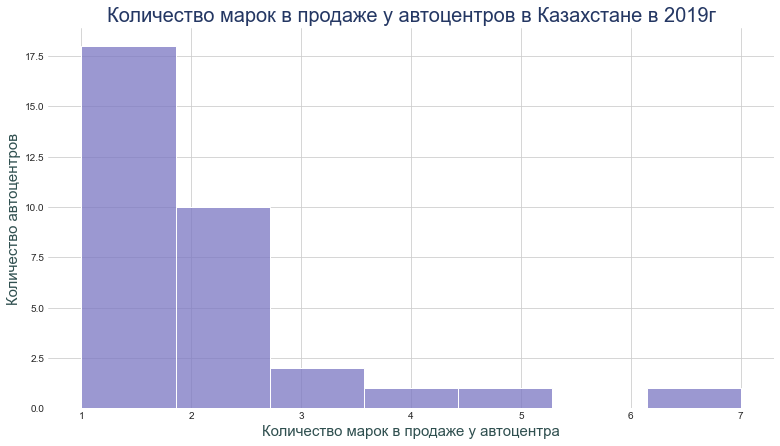

In [1281]:
#график plt.bar
plt.figure(figsize=(13,7)) 

sns.histplot(company_brand['brand'],stat='count',bins=7)
plt.title(f'Количество марок в продаже у автоцентров в Казахстане в 2019г', fontsize=20, color='#243763')
plt.xlabel(f'Количество марок в продаже у автоцентра', fontsize='15', color='#2F4F4F')
plt.ylabel('Количество автоцентров', fontsize='15', color='#2F4F4F')

plt.show()

*Из 34 автоцентров больше одного бренда продают 15. Всего в Казахстане продаются 46 брендов.*

**Модель**

In [1282]:
print('Количество уникальных моделей, проданных в Казахстане в 2019г:',df['model'].nunique())

Количество уникальных моделей, проданных в Казахстане в 2019г: 273


*Посмотрим 10 брендов, которые обладают большим модельным рядом в продаже.*

In [1283]:
#группировка по бренду
brand_model= df.groupby('brand')['model'].nunique().sort_values(ascending=False).to_frame().reset_index()
brand_model.head(10)

,brand,model
0,KAMAZ,24
1,BMW,14
2,Mercedes-Benz,14
3,Volkswagen,13
4,Hyundai Truck & Bus,10
5,UAZ,10
6,GAZ,9
7,Kia,9
8,Jac,9
9,Audi,9


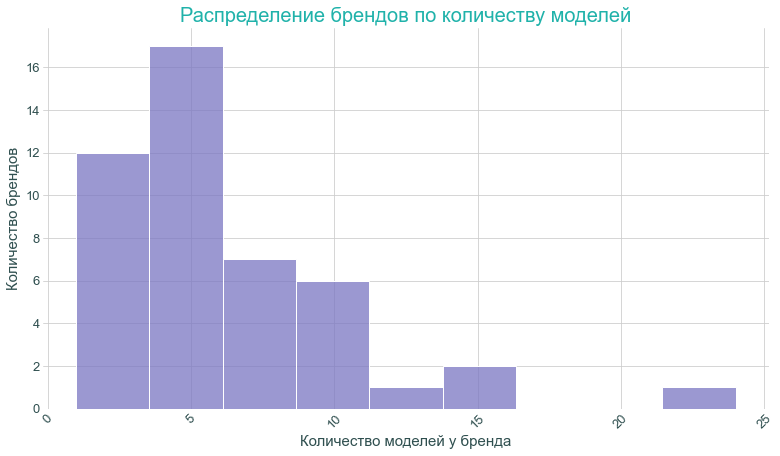

In [1284]:
#график plt.bar
plt.figure(figsize=(13,7)) 

sns.histplot(brand_model['model'])

plt.xlabel('Количество моделей у бренда',fontsize='15', color='#2F4F4F')
plt.xticks(rotation=45, fontsize='13', color='#2F4F4F')
plt.yticks(fontsize='13', color='#2F4F4F')
plt.ylabel('Количество брендов', fontsize='15', color='#2F4F4F')
plt.title('Распределение брендов по количеству моделей',fontsize='20', color='#20B2AA')
plt.show();

*В Казахстане с января по сентябрь продавалось 273 моделей автомобилей. Самый большой модельный ряд в продаже у KAMAZ. В топ-5 также входят: BMW, Mercedes, Volkswagen, Hyundai. Большенство брендов имеют 5 моделей в продаже.*

**Год выпуска**

In [1285]:
release_year_quantity= df.groupby('release_year')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
release_year_quantity['percent']=release_year_quantity['quantity'].div(release_year_quantity['quantity'].sum())
release_year_quantity

,release_year,quantity,percent
0,2019,42023,0.780038
1,2018,11416,0.211906
2,2017,394,0.007313
3,2016,30,0.000557
4,0,6,0.000111
5,2014,2,0.000037
6,2011,1,0.000019
7,2013,1,0.000019


*Основная масса(78%) проданных автомобилей - это 2019г выпуска. 2018 - 21%. 2011-2017 меньше 1 процента.*

**Страна-производитель**

In [1286]:
print('Количество стран-производителей:',df['manufacturing_country'].nunique())

Количество стран-производителей: 19


In [1287]:
#количество проданных автомобилей
manufacturing_country_quantity= df.groupby('manufacturing_country')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
manufacturing_country_quantity

,manufacturing_country,quantity
0,Республика Казахстан,31367
1,Российская Федерация,14338
2,Япония,4612
3,Турция,1167
4,Таиланд,981
5,США,507
6,Германия,357
7,UK,206
8,Китай,94
9,Узбекистан,83


In [1288]:
#страны производители, машины которых продались сильно меньше
other=manufacturing_country_quantity.loc[(manufacturing_country_quantity['manufacturing_country']!='Республика Казахстан')                                         &(manufacturing_country_quantity['manufacturing_country']!='Российская Федерация')]['quantity'].sum()
print('Количество продаж автомобилей производства не РК и РФ:\n',other)

Количество продаж автомобилей производства не РК и РФ:
 8168


In [1289]:
#датафрейм для построения графика
coun_quan={'manufacturing_country':['Республика Казахстан','Российская Федерация','Другие'],'quantity':[31367,14338,8168]}

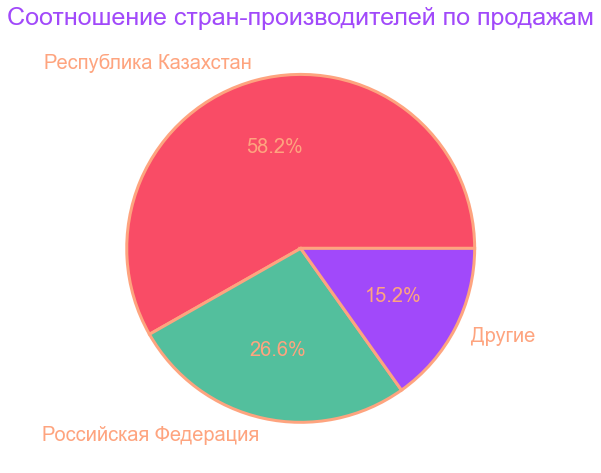

In [1290]:
#график
fig, ax = plt.subplots(figsize=(13, 8))
ax.pie(coun_quan['quantity'], labels=coun_quan['manufacturing_country'],textprops={'fontsize':20, 'color':'#FEA47F'}, 
       colors=['#F94C66', '#53BF9D','#A149FA'], autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : '#FEA47F' })

plt.title('Cоотношение стран-производителей по продажам', fontsize='25', color='#A149FA')

plt.show();

*Подавляюще большинство автомобилей произведены в Казахстане и России. При этом в Казахстане 58,2% от всех авто, а в России 26,6%. Другие стран-производители занимают лишь 15,2% продаж.*

**Вид топлива**

In [1291]:
#распределение
fuel_type_quantity= df.groupby('fuel_type')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
fuel_type_quantity['percent']=fuel_type_quantity['quantity'].div(fuel_type_quantity['quantity'].sum())
fuel_type_quantity

,fuel_type,quantity,percent
0,Бензин,50122,0.930373
1,Дизель,2365,0.0439
2,Nan,1362,0.025282
3,Электричество,14,0.00026
4,гибрид,10,0.000186


*Посмотрим какие авто ездят на дизеле*

In [1292]:
df.loc[df['fuel_type']=='Дизель']['brand'].unique()

array(['Audi', 'BMW', 'Daewoo', 'GAZ', 'Hyundai', 'Hyundai Truck & Bus',
       'Isuzu', 'Iveco', 'Jac', 'KAMAZ', 'MAN', 'Mercedes-Benz Trucks',
       'Scania', 'Volkswagen', 'Hino', 'Nefaz', 'ANKAI', 'Yutong'],
      dtype=object)

*Посмотрим класс авто на дизеле*

In [1293]:
dizel=df.loc[df['fuel_type']=='Дизель']
dizel=dizel.groupby('class_2013')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
dizel

,class_2013,quantity
0,Крупнотоннажные грузовики,1071
1,Малотоннажные грузовики,491
2,Большие автобусы,419
3,Среднетоннажные грузовики,150
4,Pick-ups,81
5,Компактные SUV,52
6,Средние автобусы,49
7,Микроавтобусы,22
8,Полноразмерный Минивэн,22
9,Полноразмерные SUV,4


*Большинство автомобилей ездят на бензине - 93%. На дизеле 4,3%. Всего 10 авто гибридных и 14 электрических. 2,5% пропусков, но при любом заполнении эти пропусков, лидером является бензин. На дизеле ездят крупные машины(грузовики, автобусы, suv).*

**Объем двигателя**

*Построим ящик с усами. Исключим пропуски.*

C:\Users\Aliya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


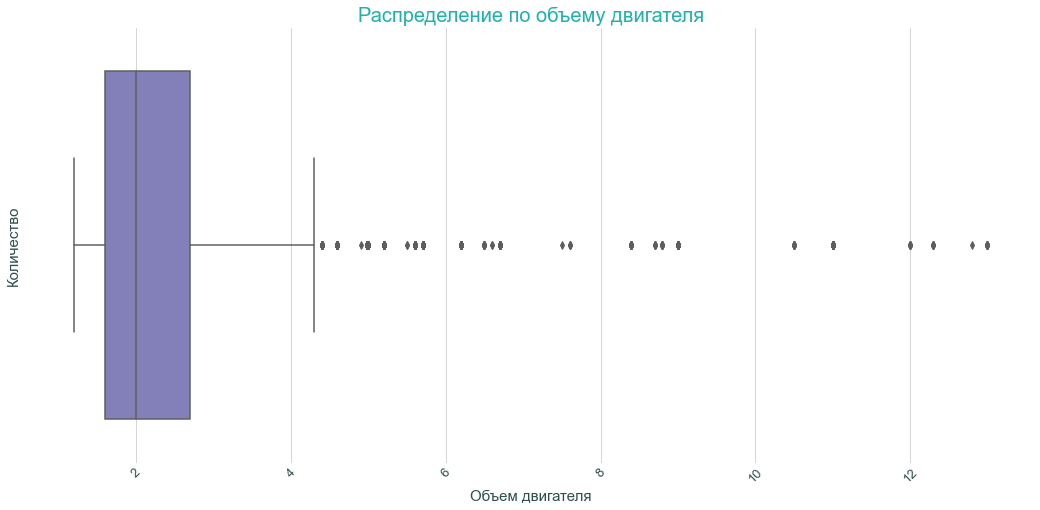

In [1294]:
plt.figure(figsize=(18,8))
sns.boxplot(df.query('engine_volume>0')['engine_volume'])

plt.xlabel('Объем двигателя',fontsize='15', color='#2F4F4F')
plt.xticks(rotation=45, fontsize='13', color='#2F4F4F')
plt.yticks(fontsize='13', color='#2F4F4F')
plt.ylabel('Количество', fontsize='15', color='#2F4F4F')
plt.title('Распределение по объему двигателя',fontsize='20', color='#20B2AA')
plt.show();

*Посмотрим перцентили, чтобы понять границу выбросов*

In [1295]:
np.percentile(df.query('engine_volume>0')['engine_volume'], [80, 90, 95, 97.5, 99])

array([ 2.7,  3.5,  4.6,  9. , 11. ])

*Большинство автомобилей с объемом двигателя 1,5-2,5. Много выбросов, потому что в датасете есть и автобусы и грузовики, которые являются многолитражками. Удалить выбросы мы не можем, потому что это 5-10% датасета.*

**Регион**

In [1296]:
#группировка по региону
region_quantity= df.groupby('region')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
region_quantity

,region,quantity
0,Алматы,13947
1,Нур-Султан,10157
2,Шымкент,3749
3,Атырау,3391
4,Костанай,3258
5,Караганда,2983
6,Уральск,2180
7,Усть-Каменогорск,2097
8,Актау,2049
9,ЭКСПОРТ,1919


*Посмотрим распределение моделей в больших городах*

In [1297]:
almaty=df.loc[df['region']=='Алматы']
almaty=almaty.groupby(['brand','model'])['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
almaty.head()

,brand,model,quantity
0,Toyota,Camry,1979
1,Hyundai,Tucson,918
2,Hyundai,Accent,763
3,Hyundai,Elantra,594
4,Lada,Granta,560


In [1298]:
astana=df.loc[df['region']=='Нур-Султан']
astana=astana.groupby(['brand','model'])['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
astana.head()

,brand,model,quantity
0,Toyota,Camry,1276
1,Hyundai,Tucson,777
2,Hyundai,Elantra,571
3,Hyundai,Creta,484
4,Hyundai,Accent,481


In [1299]:
shim=df.loc[df['region']=='Шымкент']
shim=shim.groupby(['brand','model'])['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
shim.head()

,brand,model,quantity
0,Toyota,Camry,425
1,Hyundai,Tucson,323
2,Lada,Largus,262
3,Ravon,Nexia R3,253
4,Hyundai,Elantra,240


*И в Таразе, так как сейчас я тут проживаю, и мне интересно*

In [1300]:
taraz=df.loc[df['region']=='Тараз']
taraz=taraz.groupby(['brand','model'])['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
taraz.head()

,brand,model,quantity
0,Lada,4x4,174
1,Skoda,Octavia,101
2,Dong Feng,BWC6665GA5,44
3,Lada,Vesta,36
4,Lada,Granta,34


*Посмотрим топ-5 машина на экспорт*

In [1301]:
export=df.loc[df['region']=='ЭКСПОРТ']
export=export.groupby(['brand','model'])['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
export.head()

,brand,model,quantity
0,Jac,S3,992
1,Jac,S5,246
2,Ravon,Nexia R3,138
3,Toyota,Camry,77
4,Hyundai,Accent,64


*В 3х крупных городах Казахстана больше всего продаж. В них абсолютный лидер по продажам - Toyota Camry. В небольшом городе больше берут LADA Niva, а на экспорт покупают "китайца" Jac S3,S5. Может китайские машины через Казахстан брать дешевле.*

*Тип клиента*

In [1302]:
#группировка по региону, исключение пропусков
client_quantity= df.groupby('client_type')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
client_quantity=client_quantity.query("client_type!='Nan'")
client_quantity

,client_type,quantity
0,юрлицо,29170
1,физлицо,24419


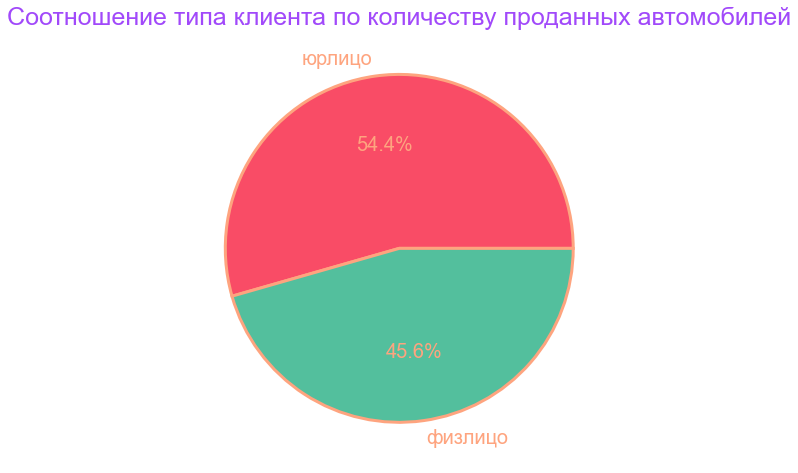

In [1303]:
#график
fig, ax = plt.subplots(figsize=(13, 8))
ax.pie(client_quantity['quantity'], labels=client_quantity['client_type'],textprops={'fontsize':20, 'color':'#FEA47F'}, 
       colors=['#F94C66', '#53BF9D'], autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : '#FEA47F' })

plt.title('Cоотношение типа клиента по количеству проданных автомобилей', fontsize='25', color='#A149FA')

plt.show();

*Большого перекоса между юрлицом и физ лицом нет. Хотя физлица купили меньше машин, чем юрлица. Скорее всего это связано с количеством машин в одной покупке, так как госзаказы, покупки для компании часто масштабные по количеству.*

In [1304]:
#группировка по региону, исключение пропусков, подсчет заказов
client_quantity_count= df.groupby('client_type')['quantity'].count().sort_values(ascending=False).to_frame().reset_index()
client_quantity_count=client_quantity_count.query("client_type!='Nan'")
client_quantity_count

,client_type,quantity
0,физлицо,24419
1,юрлицо,15260


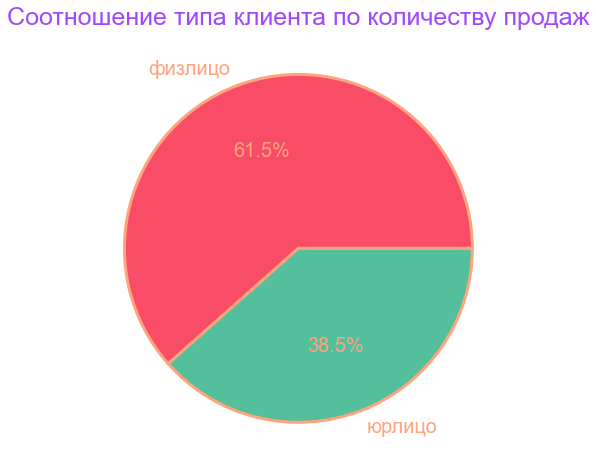

In [1305]:
#график
fig, ax = plt.subplots(figsize=(13, 8))
ax.pie(client_quantity_count['quantity'], labels=client_quantity_count['client_type'],textprops={'fontsize':20, 'color':'#FEA47F'}, 
       colors=['#F94C66', '#53BF9D'], autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : '#FEA47F' })

plt.title('Cоотношение типа клиента по количеству продаж', fontsize='25', color='#A149FA')

plt.show();

*И правда, покупок физлиц на 61,5%, а юрлиц на 38,5%. Но при этом по количеству проданных автомобилей ситуация другая*

In [1306]:
legal_entity=df.loc[df['client_type']=='юрлицо']
legal_entity_brand=legal_entity.groupby(['brand','model'])['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
legal_entity_brand.head(10)

,brand,model,quantity
0,Lada,Granta,3664
1,Lada,Vesta,2653
2,Lada,4x4,2469
3,Lada,Largus,1683
4,GAZ,3302,998
5,Kia,Rio,993
6,Jac,S3,935
7,Toyota,HILUX DC,673
8,Volkswagen,Polo,646
9,Lada,XRAY,602


*Судя по топ-5 купленных автомобилей на юр лицо, для работы берут Lada.*

In [1307]:
individual=df.loc[df['client_type']=='физлицо']
individual_brand=individual.groupby(['brand','model'])['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
individual_brand.head(10)

,brand,model,quantity
0,Toyota,Camry,4262
1,Hyundai,Tucson,3113
2,Hyundai,Accent,1899
3,Hyundai,Elantra,1838
4,Hyundai,Creta,1722
5,Ravon,Nexia R3,1539
6,Toyota,LC Prado,1422
7,Toyota,RAV4,1135
8,Toyota,Corolla,708
9,Hyundai,Santa Fe,589


*А для жизни Toyota и Hyundai*

In [1308]:
#создаю сводную таблицу по сегменту
df_n=df.query("client_type!='Nan'")
grouped_segment = df_n.pivot_table(values = 'quantity', index='segment_2013', 
                                          columns=['client_type'], aggfunc='sum').reset_index().sort_values(by='физлицо',ascending=False)
grouped_segment

client_type,segment_2013,физлицо,юрлицо
0,Внедорожники,12220,9593
2,Легковые автомобили,11933,11870
4,Пикапы,183,720
3,Минивэны,83,1741
1,Коммерческие автомобили,<NA>,5246


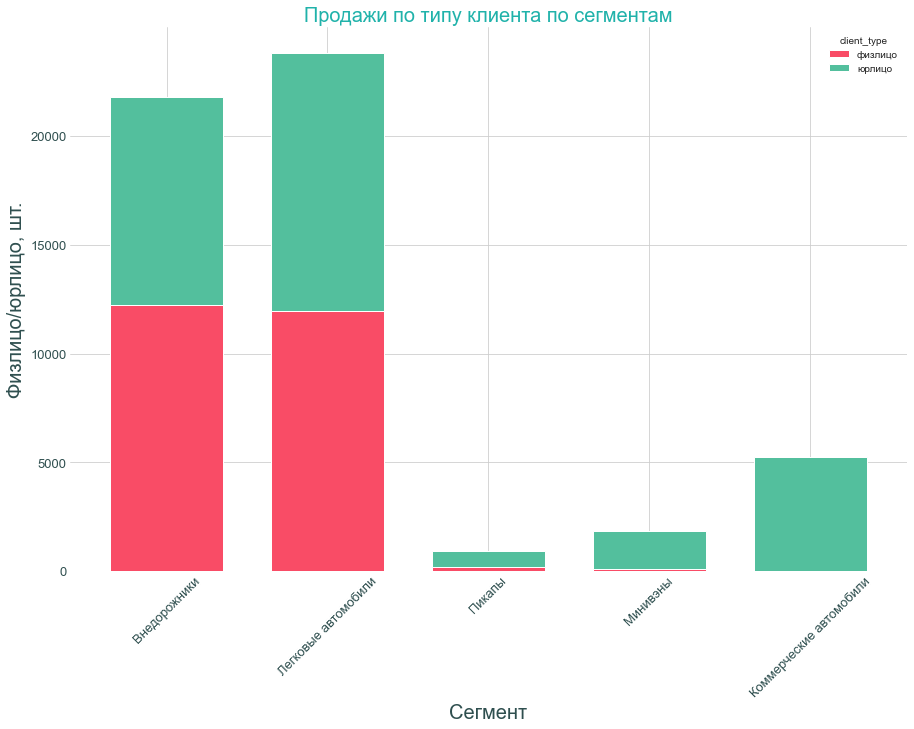

In [1309]:
#график
grouped_segment.plot(kind='bar',stacked=True, width=0.7, color=['#F94C66', '#53BF9D'],figsize=(15,10))

plt.xlabel('Сегмент', fontsize='20', color='#2F4F4F')
plt.xticks(ticks=[0,1,2,3,4],labels=grouped_segment['segment_2013'], rotation=45, fontsize='13', color='#2F4F4F')
plt.yticks(fontsize='13', color='#2F4F4F')
plt.grid(True)
plt.ylabel('Физлицо/юрлицо, шт.', fontsize='20', color='#2F4F4F')
plt.title('Продажи по типу клиента по сегментам',fontsize='20', color='#20B2AA')
plt.show();

*Физ лица в Казахстане предпочитают внедорожники и легковушки, но чуть больше внедорожники. На юрлицо купили почти столько же легковых автомобилей, сколько и на физлицо. Но по пикапам и минивэнам большой перевес  всторону юрлица. Внедорожников купили больше физлица.*

**Количесвто автомобилей в заказе**

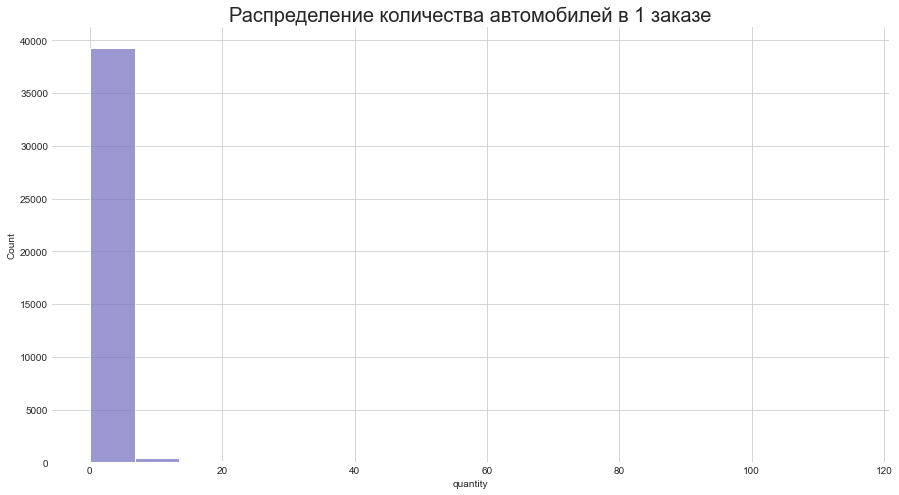

In [1310]:
plt.figure(figsize=(15,8))
plt.title('Распределение количества автомобилей в 1 заказе',fontsize='20')
sns.histplot(df['quantity']);

In [1311]:
print('Компании, продающие больше 20 автомобилей за раз:\n'
      ,df.loc[df['quantity']>=20]['company'].unique())

Компании, продающие больше 20 автомобилей за раз:
 ['Allur Auto' 'БИПЭК АВТО' 'СВС-ТРАНС' 'Volkswagen Group Rus' 'СемАЗ'
 'Daewoo Bus Kazakhstan']


In [1312]:
print('Количество продаж:\n'
      ,df.loc[df['quantity']>=20]['company'].count())

Количество продаж:
 143


In [1313]:
print('Количесво проданных авто в больших заказах:\n'
      ,df.loc[df['quantity']>=20]['quantity'].sum())

Количесво проданных авто в больших заказах:
 4381


*Большиство продаж с 1-2 автомобилями. Компании 'Allur Auto', 'БИПЭК АВТО','СВС-ТРАНС','Volkswagen Group Rus','СемАЗ', 'Daewoo Bus Kazakhstan' скорее всего являются поставщиками в диллерские центры, работающие с бизнессом. Например, компания Allur Auto является официальным производителем, дистрибьютором и партнёром на территории Казахстана автобрендов Chevrolet, Kia, JAC и LADA. Продаж с большим количеством авто 143, это немного, но при этом за эти продажи было реализовано 4381 автомобиля.* 

*Цена*

C:\Users\Aliya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


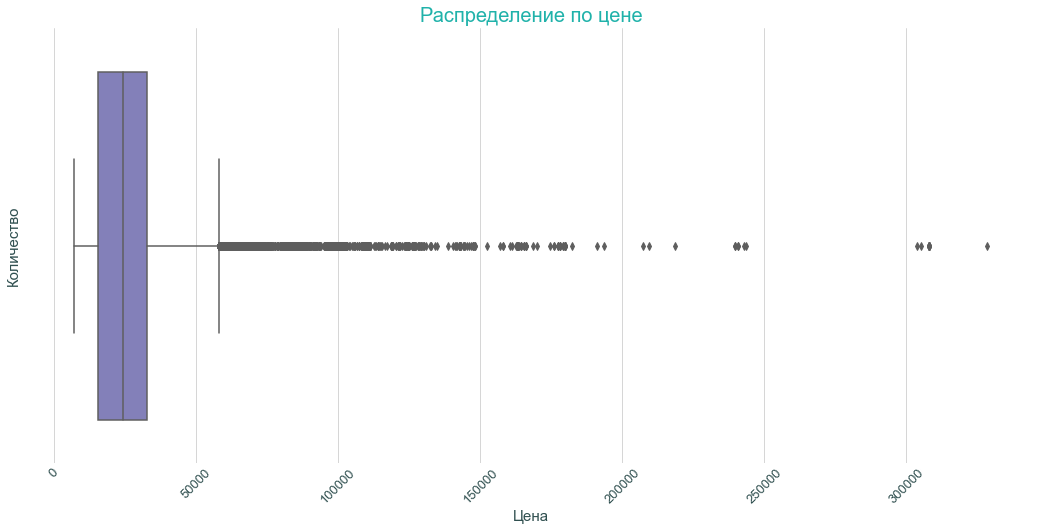

In [1314]:
#график с усами
plt.figure(figsize=(18,8))
sns.boxplot(df.query('price_usd>0')['price_usd'])

plt.xlabel('Цена',fontsize='15', color='#2F4F4F')
plt.xticks(rotation=45, fontsize='13', color='#2F4F4F')
plt.yticks(fontsize='13', color='#2F4F4F')
plt.ylabel('Количество', fontsize='15', color='#2F4F4F')
plt.title('Распределение по цене',fontsize='20', color='#20B2AA')
plt.show();

In [1315]:
#перцентиль
np.percentile(df.query('price_usd>0')['price_usd'], [85 ,95, 97.5, 99])

array([ 42129.16977,  67922.08052,  83470.63732, 107348.3286 ])

C:\Users\Aliya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


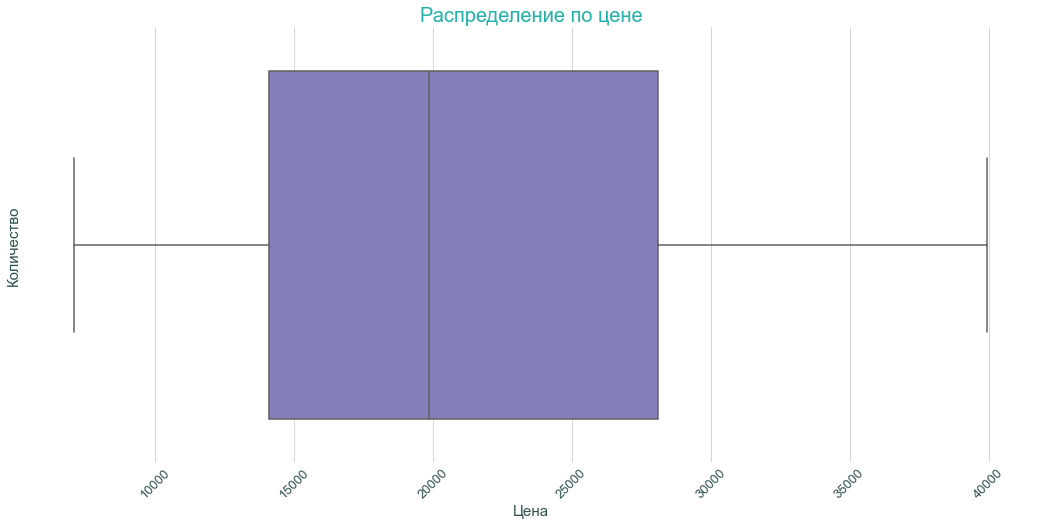

In [1316]:
#график с усами без выбросов
plt.figure(figsize=(18,8))
sns.boxplot(df.query('0<price_usd<40000')['price_usd'])

plt.xlabel('Цена',fontsize='15', color='#2F4F4F')
plt.xticks(rotation=45, fontsize='13', color='#2F4F4F')
plt.yticks(fontsize='13', color='#2F4F4F')
plt.ylabel('Количество', fontsize='15', color='#2F4F4F')
plt.title('Распределение по цене',fontsize='20', color='#20B2AA')
plt.show();

*Основная масса автомобилей в ценовом диапазоне 14000-28000 USD.Больше чем 42000 стоят 15% датасета*

In [1317]:
print('Минимальная цена:\n',round(df['price_usd'].min(),2))
print('Максимальная цена:\n',round(df['price_usd'].max(),2))
print('Средняя цена:\n',round(df['price_usd'].mean(),2))

Минимальная цена:
 7100.0
Максимальная цена:
 328510.97
Средняя цена:
 28251.34


*Посмотрим лидеров по продаже в ценовой категории от 50000*

In [1318]:
big_price=df.loc[df['price_usd']>=50000]
big_price.groupby(['brand','model'])['quantity'].sum().sort_values(ascending=False).to_frame().reset_index().head(10)

,brand,model,quantity
0,Toyota,LC200,779
1,Toyota,LC Prado,557
2,Lexus,RX,336
3,Lexus,LX,318
4,ANKAI,HFF6850G,240
5,Toyota,HIGHLANDER,191
6,BMW,X5,168
7,KAMAZ,43118,112
8,Shacman,SX3258DR384,101
9,Toyota,Camry,97


*В топе 2 грузовика, автобус и крутые внедорожники от Toyota,Lexus и BMW*

*Посмотрим самые дорогие машины от 300000USD*

In [1319]:
big_price.loc[big_price['price_usd']>=300000]

,year,month,company,brand,model,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,...,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,product_localization,sale_date
20402,2019,5,Autokapital,Mercedes-Benz Trucks,Tourismo,2019,Турция,Дизель,12.0,AT,...,Атырау,юрлицо,1,305252.0154,305252.0154,Атырауская область,Коммерческие автомобили,Большие автобусы,Импорт,2019-05-01
20403,2019,6,Autokapital,Mercedes-Benz Trucks,Tourismo,2019,Турция,Дизель,12.0,AT,...,Атырау,юрлицо,1,303650.8783,303650.8783,Атырауская область,Коммерческие автомобили,Большие автобусы,Импорт,2019-06-01
39818,2019,7,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,8.8,Nan,...,Костанай,юрлицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство,2019-07-01
39819,2019,7,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,8.8,Nan,...,Костанай,юрлицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство,2019-07-01
39820,2019,7,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,8.8,Nan,...,Костанай,юрлицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство,2019-07-01
39821,2019,7,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,8.8,Nan,...,Костанай,юрлицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство,2019-07-01
39822,2019,7,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,8.8,Nan,...,Костанай,юрлицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство,2019-07-01
39823,2019,7,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,8.8,Nan,...,Костанай,юрлицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство,2019-07-01
39824,2019,7,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,8.8,Nan,...,Костанай,юрлицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство,2019-07-01
39825,2019,7,Allur Auto,ANKAI,HFF6124G03EV3,2019,Республика Казахстан,Электричество,8.8,Nan,...,Костанай,юрлицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство,2019-07-01


*13 записей из них 10 - это один и тотже большой автобус ANKAI HFF6124G03EV3, проданный компанией Allur Auto в июле. Можно подумать, что это дубликат, либо. возможно, можно было записать все в одну строку с уазанием количества автомобилей 10. 3 Mercedes-Benz Trucks также в списке.*

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> В ходе исследовательского анализа данных выяснилось:<br />
    -Из 34 автоцентров больше одного бренда продают 15. Всего в Казахстане продаются 46 брендов автомобилей<br />
-В Казахстане с января по сентябрь продавалось 273 моделей автомобилей. Самый большой модельный ряд в продаже у KAMAZ. В топ-5 также входят: BMW, Mercedes, Volkswagen, Hyundai. Большенство брендов имеют 5 моделей в продаже.<br />
-Основная масса(78%) проданных автомобилей - это машины 2019г выпуска. 2018 - 21%. 2011-2017 меньше 1 процента.<br />
-Подавляюще большинство автомобилей произведены в Казахстане и России. При этом в Казахстане 58,2% от всех авто, а в России 26,6%. Другие стран-производители занимают лишь 15,2% продаж.<br />
-Большинство автомобилей ездят на бензине - 93%. На дизеле 4,3%. Всего 10 авто гибридных и 14 электрических. 2,5% пропусков, но при любом заполнении эти пропусков, лидером является бензин. На дизеле ездят крупные машины(грузовики, автобусы, suv).<br />
-Большинство автомобилей с объемом двигателя 1,5-2,5. <br />
-В 3х крупных городах Казахстана(Алмата, Нур-Султан, Шымкент) больше всего продаж. В них абсолютный лидер по продажам - Toyota Camry. В небольшом городе больше берут LADA Niva, а на экспорт покупают "китайца" Jac S3,S5. <br />
-Большого перекоса между юрлицом и физ лицом нет. Хотя физлица купили меньше машин, чем юрлица. Скорее всего это связано с количеством машин в одной покупке, так как госзаказы, покупки для компании часто масштабные по количеству.<br />
-Судя по топ-5 купленных автомобилей на юр лицо, для работы берут Lada. А для жизни Toyota и Hyundai<br />
-Физ лица в Казахстане предпочитают внедорожники и легковушки, но чуть больше внедорожники. На юрлицо купили почти столько же легковых автомобилей, сколько и на физлицо. Но по пикапам и минивэнам большой перевес  всторону юрлица. Внедорожников купили больше физлица.<br />
-Большиство продаж с 1-2 автомобилями. Компании 'Allur Auto', 'БИПЭК АВТО','СВС-ТРАНС','Volkswagen Group Rus','СемАЗ', 'Daewoo Bus Kazakhstan' скорее всего являются поставщиками в диллерские центры, работающие с бизнессом. Например, компания Allur Auto является официальным производителем, дистрибьютором и партнёром на территории Казахстана автобрендов Chevrolet, Kia, JAC и LADA. Продаж с большим количеством авто 143, это немного, но при этом за эти продажи было реализовано 4381 автомобиля.<br />
-Основная масса автомобилей в ценовом диапазоне 14000-28000 USD.Больше чем 42000 стоят 15% датасета<br />
-Самые дорогие авто ANKAI HFF6124G03EV3 и Mercedes-Benz Trucks <br />

## Анализ рынка.

**Емкость рынка автомобилей в Казахстане**

In [1320]:
print('Емкость рынка автомобилей в Казахстане за 9мес:\n',df.shape[0])

Емкость рынка автомобилей в Казахстане за 9мес:
 39963


*Чтобы рассчитать прогнозную емкость за весь год, возьмем на остаток года 40% от продаж, так как мы выяснили, что продажи к концу года уввеличиваются.*

In [1321]:
print('Прогнозная емкость рынка автомобилей в Казахстане:\n', int(df.shape[0]+df.shape[0]*.4))

Прогнозная емкость рынка автомобилей в Казахстане:
 55948


In [1322]:
print('Емкость рынка автомобилей в Казахстане за 9мес:\n',round(df['sell_price_usd'].sum(),2))

Емкость рынка автомобилей в Казахстане за 9мес:
 1349121537.37


In [1323]:
print('Прогнозная емкость рынка автомобилей в Казахстане:\n', round((round(df['sell_price_usd'].sum(),2)+
                                                                     round(df['sell_price_usd'].sum(),2)*.4),2))

Прогнозная емкость рынка автомобилей в Казахстане:
 1888770152.32


In [1324]:
print('Средняя стоимость продажи:\n', round(df['sell_price_usd'].sum()/df.shape[0],2))

Средняя стоимость продажи:
 33759.27


*Распределения по месяцам*

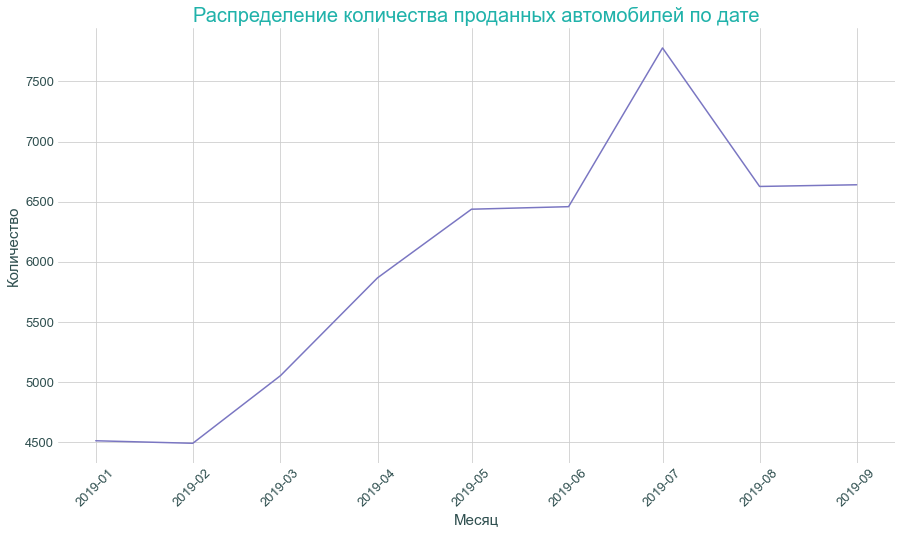

In [1325]:
#распределение количества проданных авто
df_date=df.groupby(['sale_date'])['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
#график
plt.figure(figsize=(15,8))
sns.lineplot(x=df_date['sale_date'],y=df_date['quantity'], data=df_date)

plt.xlabel('Месяц',fontsize='15', color='#2F4F4F')
plt.xticks(rotation=45, fontsize='13', color='#2F4F4F')
plt.yticks(fontsize='13', color='#2F4F4F')
plt.ylabel('Количество', fontsize='15', color='#2F4F4F')
plt.title('Распределение количества проданных автомобилей по дате',fontsize='20', color='#20B2AA')
plt.show();

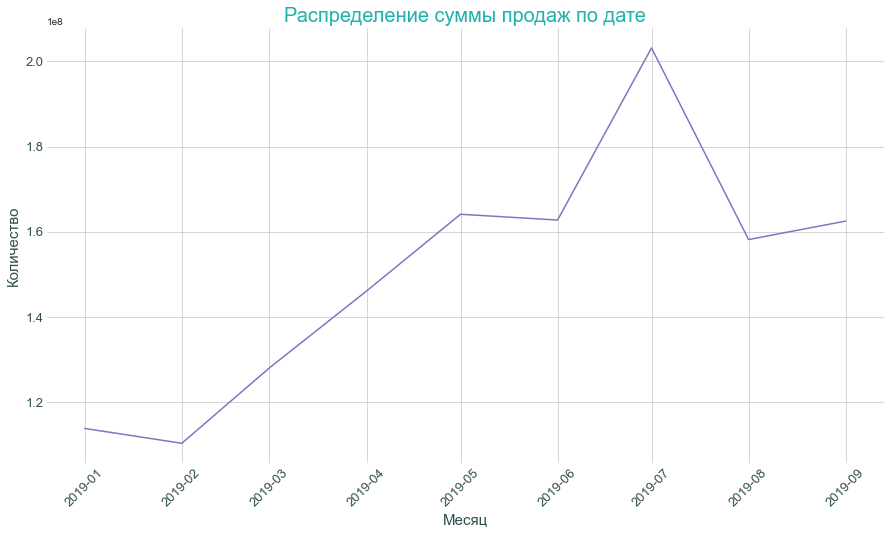

In [1326]:
#распределение суммы продаж
df_sell=df.groupby(['sale_date'])['sell_price_usd'].sum().sort_values(ascending=False).to_frame().reset_index()
#график
plt.figure(figsize=(15,8))
sns.lineplot(x=df_sell['sale_date'],y=df_sell['sell_price_usd'], data=df_sell)

plt.xlabel('Месяц',fontsize='15', color='#2F4F4F')
plt.xticks(rotation=45, fontsize='13', color='#2F4F4F')
plt.yticks(fontsize='13', color='#2F4F4F')
plt.ylabel('Количество', fontsize='15', color='#2F4F4F')
plt.title('Распределение суммы продаж по дате',fontsize='20', color='#20B2AA')
plt.show();

*Наблюдается рост выручики с каждым месяцем. Сильный скачок в июле, но уже в августе продаж и выручки стало меньше, чем было в июня до скачка.*

**Разделим рынок на коммерческий и некоммерческий**

*График долей рынка по бренду*

*Графика два, так как разделяем коомерцию и не коммерцию*

In [1327]:
#разделение дф
comm= df[df['segment_2013']=='Коммерческие автомобили']
non_comm = df[df['segment_2013'] !='Коммерческие автомобили']

In [1328]:
#группировка по бренду и подсчет суммы продаж
pie_comm = (comm.groupby('brand')['sell_price_usd'].sum()
            .sort_values(ascending=False)).to_frame().reset_index().nlargest(10,'sell_price_usd')
size_comm=pie_comm['sell_price_usd'].tolist()
labels_comm=pie_comm['brand'].tolist()

pie_non_comm = (non_comm.groupby('brand')['sell_price_usd'].sum()
            .sort_values(ascending=False)).to_frame().reset_index().nlargest(10,'sell_price_usd')
size_non_comm=pie_non_comm['sell_price_usd'].tolist()
labels_non_comm=pie_non_comm['brand'].tolist()

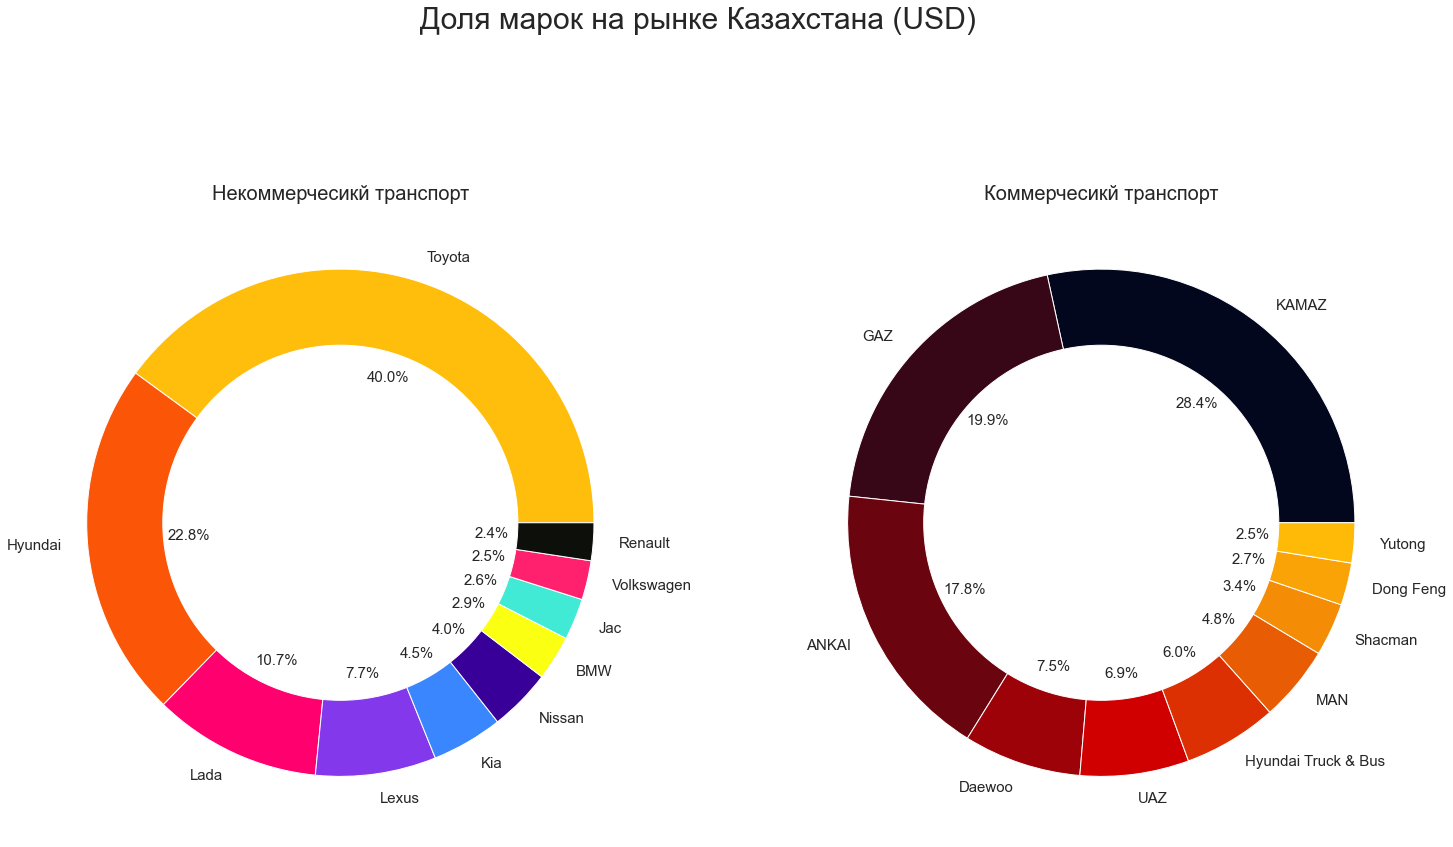

In [1329]:
#график
colors=['#ffbe0b','#fb5607','#ff006e','#8338ec','#3a86ff','#390099','#fbff12','#41ead4','#ff206e','#0c0f0a']
colors_c=['#03071e','#370617','#6a040f','#9d0208','#d00000','#dc2f02','#e85d04','#f48c06','#faa307','#ffba08']

plt.figure(figsize=(25,15))
plt.suptitle('Доля марок на рынке Казахстана (USD)', fontsize=30)

plt.subplot(1,2,1)
plt.title('Некоммерчесикй транспорт',fontdict={'size':20})

plt.pie(size_non_comm, labels=labels_non_comm, textprops = {"fontsize":15}, autopct='%1.1f%%', colors=colors)

my_circle=plt.Circle((0,0),0.7,color='white')
plt.gca().add_artist(my_circle)

plt.subplot(1,2,2)
plt.title('Коммерчесикй транспорт',fontdict={'size':20})
plt.pie(size_comm, labels=labels_comm,textprops = {"fontsize":15}, autopct='%1.1f%%',colors=colors_c)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.gca().add_artist(my_circle)

plt.show()

*В потребительском секторе лидирует Toyota с продажами в 40% от рынка. Почти в два раза меньше у Hyndai-22,8% и в 4 раза у LADA-10,7%. В коммерческом секторе 28,4% рынка занимает KAMAZ, 19,9% GAZ и ANKAI 17,8%. Выше мы выяснили, что Toyota в лидерах по количеству продаж в крупных городах, а благодаря своей цене, компания обладает 40% рынка. В коммерческом же секторе все логично - крупные, дорогие грузовики и автобусы занимают весь топ-10.*

*В таком же формате посмотрим доли компаний*

In [1330]:
#группировка по компаниям и подсчет суммы продаж
pie_comm_comp = (comm.groupby('company')['sell_price_usd'].sum()
            .sort_values(ascending=False)).to_frame().reset_index().nlargest(10,'sell_price_usd')
size_comm_comp=pie_comm_comp['sell_price_usd'].tolist()
labels_comm_comp=pie_comm_comp['company'].tolist()

pie_non_comm_comp = (non_comm.groupby('company')['sell_price_usd'].sum()
            .sort_values(ascending=False)).to_frame().reset_index().nlargest(10,'sell_price_usd')
size_non_comm_comp=pie_non_comm_comp['sell_price_usd'].tolist()
labels_non_comm_comp=pie_non_comm_comp['company'].tolist()

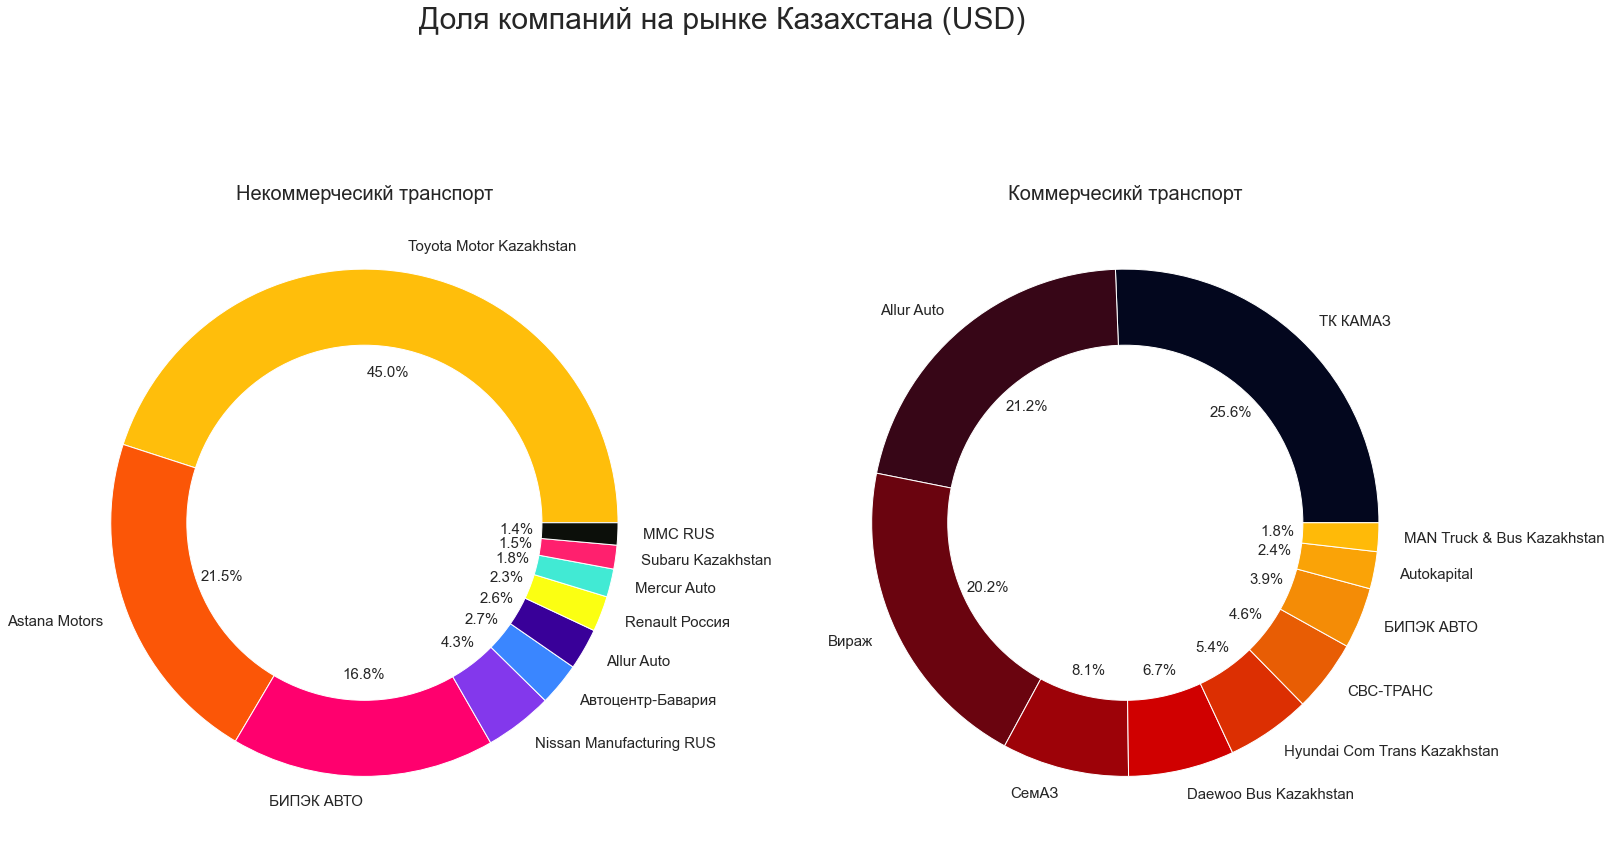

In [1331]:
#график
plt.figure(figsize=(25,15))
plt.suptitle('Доля компаний на рынке Казахстана (USD)', fontsize=30)

plt.subplot(1,2,1)
plt.title('Некоммерчесикй транспорт',fontdict={'size':20})

plt.pie(size_non_comm_comp, labels=labels_non_comm_comp, textprops = {"fontsize":15}, autopct='%1.1f%%', colors=colors)

my_circle=plt.Circle((0,0),0.7,color='white')
plt.gca().add_artist(my_circle)

plt.subplot(1,2,2)
plt.title('Коммерчесикй транспорт',fontdict={'size':20})
plt.pie(size_comm_comp, labels=labels_comm_comp, textprops = {"fontsize":15}, autopct='%1.1f%%',colors=colors_c)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.gca().add_artist(my_circle)

plt.show()

*Toyota Motor Kazakhstan занимает чуть ли не половину потребительского рынка в Казахстане - 45%. Дальше идет столичный Astana Motors с 21,5% и БИПЭК АВТО 16,6%, который торгует брендом LADA. В коммерческом секторе тройка лидеров - ТК КАМАЗ,Allur Auto,Вираж. БИПЭК и Allur Auto две компании, которые в 10ке в обоих секторах.*

In [1332]:
#распределение суммы продаж
comm_sell=comm.groupby(['sale_date'])['sell_price_usd'].sum().sort_values(ascending=False).to_frame().reset_index()
size_comm_sell=comm_sell['sell_price_usd'].tolist()
labels_comm_sell=comm_sell['sale_date'].tolist()

non_comm_sell=non_comm.groupby(['sale_date'])['sell_price_usd'].sum().sort_values(ascending=False).to_frame().reset_index()
size_non_comm_sell=non_comm_sell['sell_price_usd'].tolist()
labels_non_comm_sell=non_comm_sell['sale_date'].tolist()

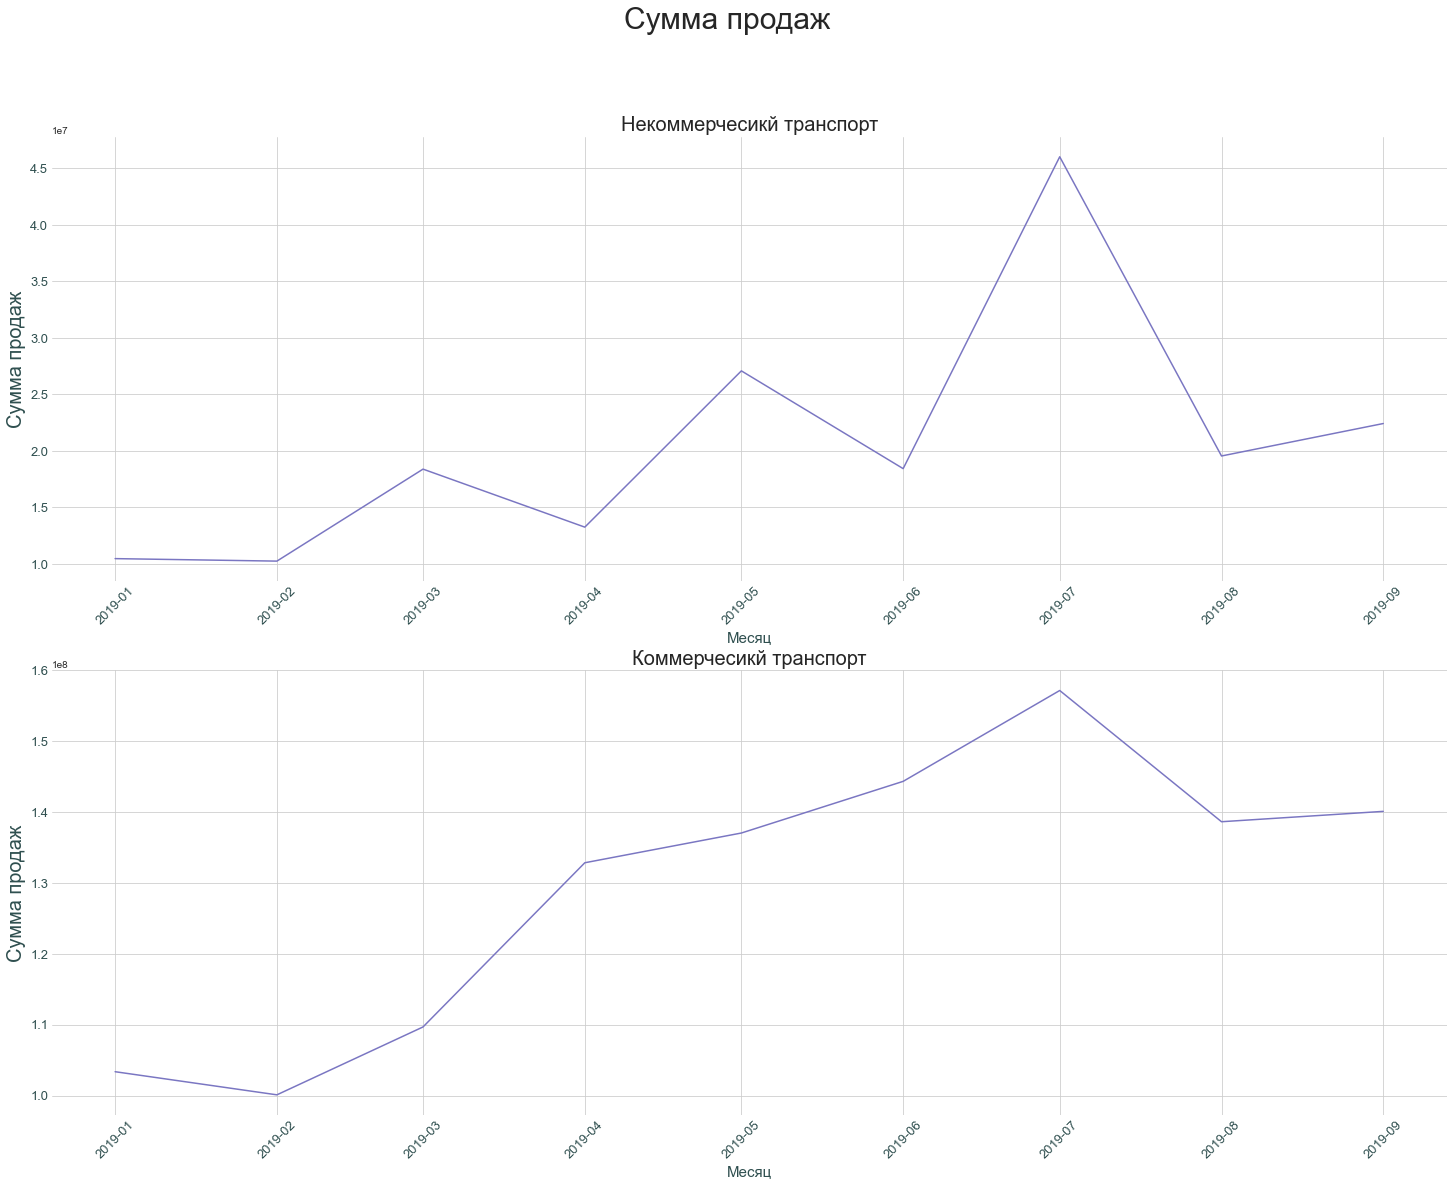

In [1334]:
plt.figure(figsize=(25,18))
plt.suptitle('Сумма продаж', fontsize=30)

plt.subplot(2,1,1)
plt.title('Некоммерчесикй транспорт',fontdict={'size':20})

sns.lineplot(x=labels_comm_sell,y=size_comm_sell, )

plt.xlabel('Месяц',fontsize='15', color='#2F4F4F')
plt.xticks(rotation=45, fontsize='13', color='#2F4F4F')
plt.yticks(fontsize='13', color='#2F4F4F')
plt.ylabel('Сумма продаж', fontsize='20', color='#2F4F4F')


plt.subplot(2,1,2)
plt.title('Коммерчесикй транспорт',fontdict={'size':20})

sns.lineplot(x=labels_non_comm_sell,y=size_non_comm_sell)

plt.xlabel('Месяц',fontsize='15', color='#2F4F4F')
plt.xticks(rotation=45, fontsize='13', color='#2F4F4F')
plt.yticks(fontsize='13', color='#2F4F4F')
plt.ylabel('Сумма продаж', fontsize='20', color='#2F4F4F')

plt.show()

*Продажи в некоммерческом секторе идут скачкообразно. Подъемы в марте, мае и июле. Это может быть связано с планом/программой одобрения кредита в банке, акциями или завозами автомобилей в диллерские центры. В коммерческом секторе после небольшой просадки в феврале сумма продаж посепенно уведичивается, доходя до пика в июле, после чего падает ниже июнского показателя.*

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> -Емкость рынка автомобилей в Казахстане за 9мес: 1349121537 <br />
-Прогнозная емкость рынка автомобилей в Казахстане: 1888770152
-Средняя стоимость продажи: 33759.27
-Наблюдается рост выручики с каждым месяцем. Сильный скачок в июле, но уже в августе продаж и выручки стало меньше, чем было в июня до скачка<br />
-В потребительском секторе лидирует Toyota с продажами в 40% от рынка. Почти в два раза меньше у Hyndai-22,8% и в 4 раза у LADA-10,7%. В коммерческом секторе 28,4% рынка занимает KAMAZ, 19,9% GAZ и ANKAI 17,8%. Выше мы выяснили, что Toyota в лидерах по количеству продаж в крупных городах, а благодаря своей цене, компания обладает 40% рынка. В коммерческом же секторе все логично - крупные, дорогие грузовики и автобусы занимают весь топ-10.<br />
-Toyota Motor Kazakhstan занимает чуть ли не половину потребительского рынка в Казахстане - 45%. Дальше идет столичный Astana Motors с 21,5% и БИПЭК АВТО 16,6%, который торгует брендом LADA. В коммерческом секторе тройка лидеров - ТК КАМАЗ,Allur Auto,Вираж. БИПЭК и Allur Auto две компании, которые в 10ке в обоих секторах.<br />
-Продажи в некоммерческом секторе идут скачкообразно. Подъемы в марте, мае и июле. Это может быть связано с планом/программой одобрения кредита в банке, акциями или завозами автомобилей в диллерские центры. В коммерческом секторе после небольшой просадки в феврале сумма продаж посепенно уведичивается, доходя до пика в июле, после чего падает ниже июнского показателя.<br />

## Рекомендации

<div style="border:solid green 2px; padding: 20px">
<p></p> Для увеличения продаж, я бы рекомендовала:<br />
    -сделать акцент на продажи из топ-10 самых продаваемых автомобилей. Например, закупить больше вариаций модели, цветов, комплектаций<br />
    -проанализировать запрос на китайские автомобили, которые пойдут на экспорт. Возможно, анализ покажет, что спрос высокий. <br />
    -проанализировать причину скачка продаж в июле<br />